**Part 1: Data Preparation and Exploration**

PART 1: DATA PREPARATION AND EXPLORATION
Loading and preparing data...
Missing values: 0
Dataset shape: (7588, 1)
Date range: 1990-01-01 00:00:00 to 2010-10-10 00:00:00

Exploring data...


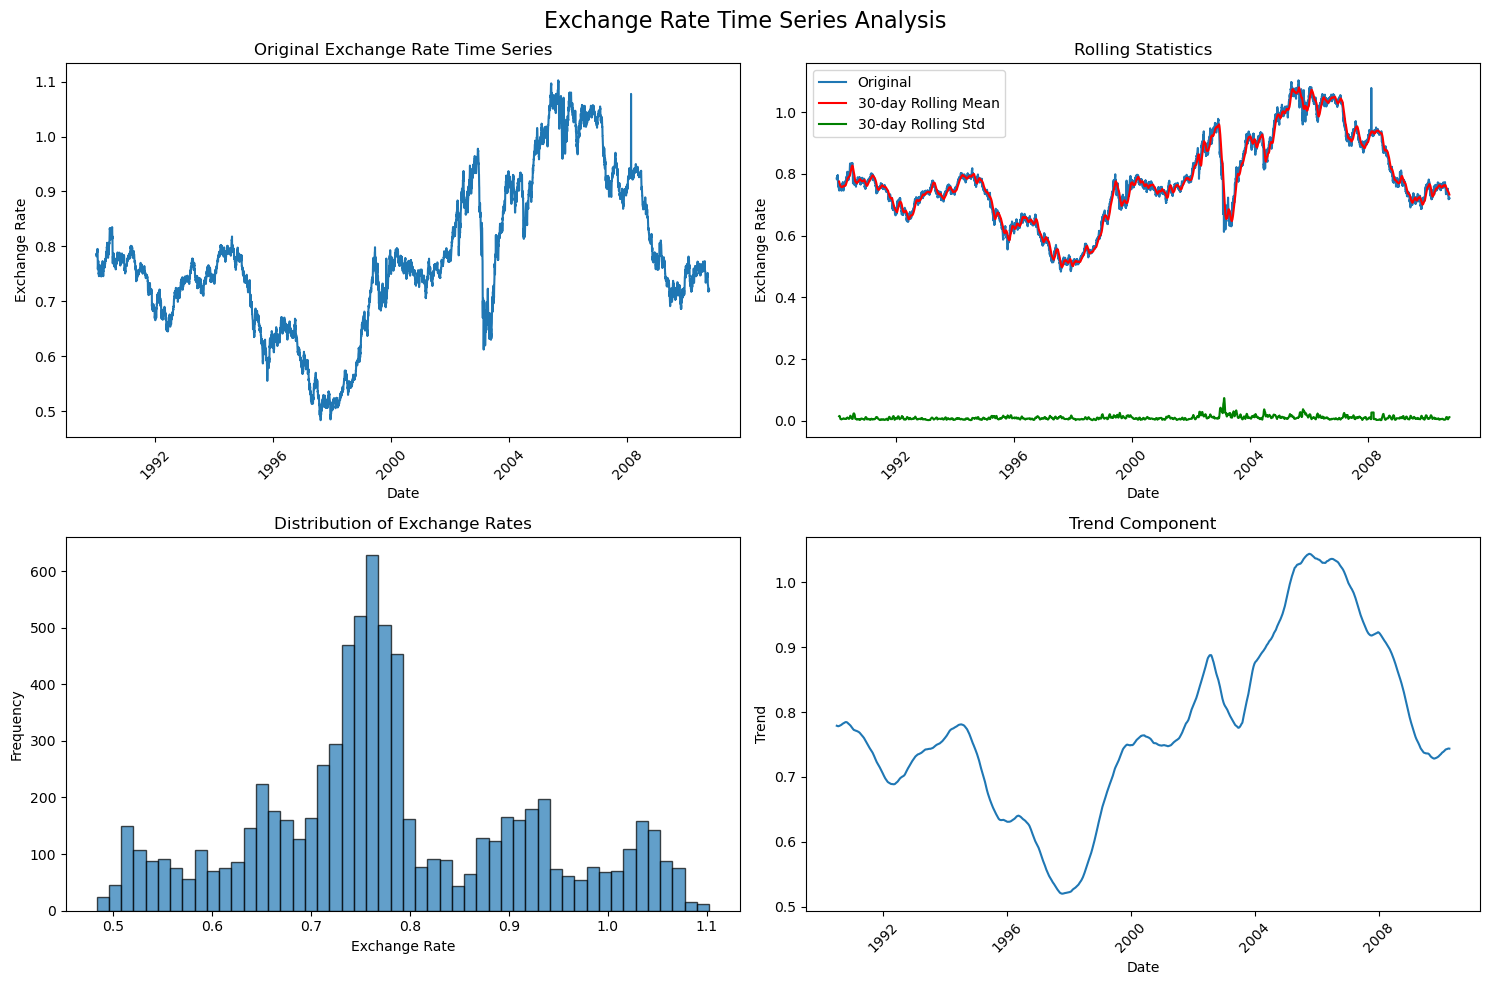


Testing for stationarity...
ADF Statistic: -1.664994
p-value: 0.449233
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is not stationary - differencing required
Series is stationary after first difference
Training data: 6070 samples
Testing data: 1518 samples
Training period: 1990-01-01 00:00:00 to 2006-08-14 00:00:00
Testing period: 2006-08-15 00:00:00 to 2010-10-10 00:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings('ignore')

class DataPreparer:
    def __init__(self, file_path):
        self.file_path = file_path
        self.data = None
        self.train_data = None
        self.test_data = None

    def load_and_prepare_data(self):
        """
        Load and prepare the exchange rate data
        """
        print("Loading and preparing data...")

        # Load the dataset
        self.data = pd.read_csv(self.file_path)

        # Parse date column
        self.data['date'] = pd.to_datetime(self.data['date'], format='%d-%m-%Y %H:%M')

        # Set date as index
        self.data.set_index('date', inplace=True)

        # Sort by date
        self.data.sort_index(inplace=True)

        # Check for missing values
        print(f"Missing values: {self.data['Ex_rate'].isnull().sum()}")

        # Handle missing values by forward fill
        self.data['Ex_rate'].fillna(method='ffill', inplace=True)

        # Basic information about the dataset
        print(f"Dataset shape: {self.data.shape}")
        print(f"Date range: {self.data.index.min()} to {self.data.index.max()}")

        return self.data

    def explore_data(self):
        """
        Initial exploration and visualization of the time series
        """
        print("\nExploring data...")

        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        fig.suptitle('Exchange Rate Time Series Analysis', fontsize=16)

        # 1. Original time series
        axes[0, 0].plot(self.data.index, self.data['Ex_rate'])
        axes[0, 0].set_title('Original Exchange Rate Time Series')
        axes[0, 0].set_xlabel('Date')
        axes[0, 0].set_ylabel('Exchange Rate')
        axes[0, 0].tick_params(axis='x', rotation=45)

        # 2. Rolling statistics
        rolling_mean = self.data['Ex_rate'].rolling(window=30).mean()
        rolling_std = self.data['Ex_rate'].rolling(window=30).std()

        axes[0, 1].plot(self.data.index, self.data['Ex_rate'], label='Original')
        axes[0, 1].plot(self.data.index, rolling_mean, label='30-day Rolling Mean', color='red')
        axes[0, 1].plot(self.data.index, rolling_std, label='30-day Rolling Std', color='green')
        axes[0, 1].set_title('Rolling Statistics')
        axes[0, 1].set_xlabel('Date')
        axes[0, 1].set_ylabel('Exchange Rate')
        axes[0, 1].legend()
        axes[0, 1].tick_params(axis='x', rotation=45)

        # 3. Distribution
        axes[1, 0].hist(self.data['Ex_rate'], bins=50, alpha=0.7, edgecolor='black')
        axes[1, 0].set_title('Distribution of Exchange Rates')
        axes[1, 0].set_xlabel('Exchange Rate')
        axes[1, 0].set_ylabel('Frequency')

        # 4. Seasonal decomposition (using 365 days for yearly seasonality)
        try:
            decomposition = seasonal_decompose(self.data['Ex_rate'], model='additive', period=365)
            axes[1, 1].plot(decomposition.trend)
            axes[1, 1].set_title('Trend Component')
            axes[1, 1].set_xlabel('Date')
            axes[1, 1].set_ylabel('Trend')
            axes[1, 1].tick_params(axis='x', rotation=45)
        except:
            axes[1, 1].text(0.5, 0.5, 'Seasonal decomposition\nnot available',
                           ha='center', va='center', transform=axes[1, 1].transAxes)

        plt.tight_layout()
        plt.show()

        # Stationarity test
        self._test_stationarity()

    def _test_stationarity(self):
        """
        Perform Augmented Dickey-Fuller test for stationarity
        """
        print("\nTesting for stationarity...")
        result = adfuller(self.data['Ex_rate'].dropna())
        print(f'ADF Statistic: {result[0]:.6f}')
        print(f'p-value: {result[1]:.6f}')
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'\t{key}: {value:.3f}')

        if result[1] <= 0.05:
            print("Series is stationary")
            self.d = 0
        else:
            print("Series is not stationary - differencing required")
            # Test after first difference
            diff_series = self.data['Ex_rate'].diff().dropna()
            result_diff = adfuller(diff_series)
            if result_diff[1] <= 0.05:
                print("Series is stationary after first difference")
                self.d = 1
            else:
                print("Series may require more differencing")
                self.d = 1  # Default to 1 for simplicity

        return self.d

    def prepare_train_test_split(self, test_size=0.2):
        """
        Split data into training and testing sets
        """
        n = len(self.data)
        split_idx = int(n * (1 - test_size))

        self.train_data = self.data.iloc[:split_idx]
        self.test_data = self.data.iloc[split_idx:]

        print(f"Training data: {len(self.train_data)} samples")
        print(f"Testing data: {len(self.test_data)} samples")
        print(f"Training period: {self.train_data.index.min()} to {self.train_data.index.max()}")
        print(f"Testing period: {self.test_data.index.min()} to {self.test_data.index.max()}")

        return self.train_data, self.test_data

def run_data_preparation():
    """
    Run Part 1: Data Preparation and Exploration
    """
    print("=" * 60)
    print("PART 1: DATA PREPARATION AND EXPLORATION")
    print("=" * 60)

    # Initialize and run data preparation
    preparer = DataPreparer(r'C:\Users\Admin\Documents\EXCELR\DS Assignments\@\exchange_rate.csv')

    # Load and prepare data
    data = preparer.load_and_prepare_data()

    # Explore data
    preparer.explore_data()

    # Prepare train-test split
    train_data, test_data = preparer.prepare_train_test_split()

    return preparer, data, train_data, test_data

if __name__ == "__main__":
    preparer, data, train_data, test_data = run_data_preparation()

**Part 2: ARIMA Model Building**

PART 2: ARIMA MODEL BUILDING

Plotting ACF and PACF for ARIMA parameter selection...


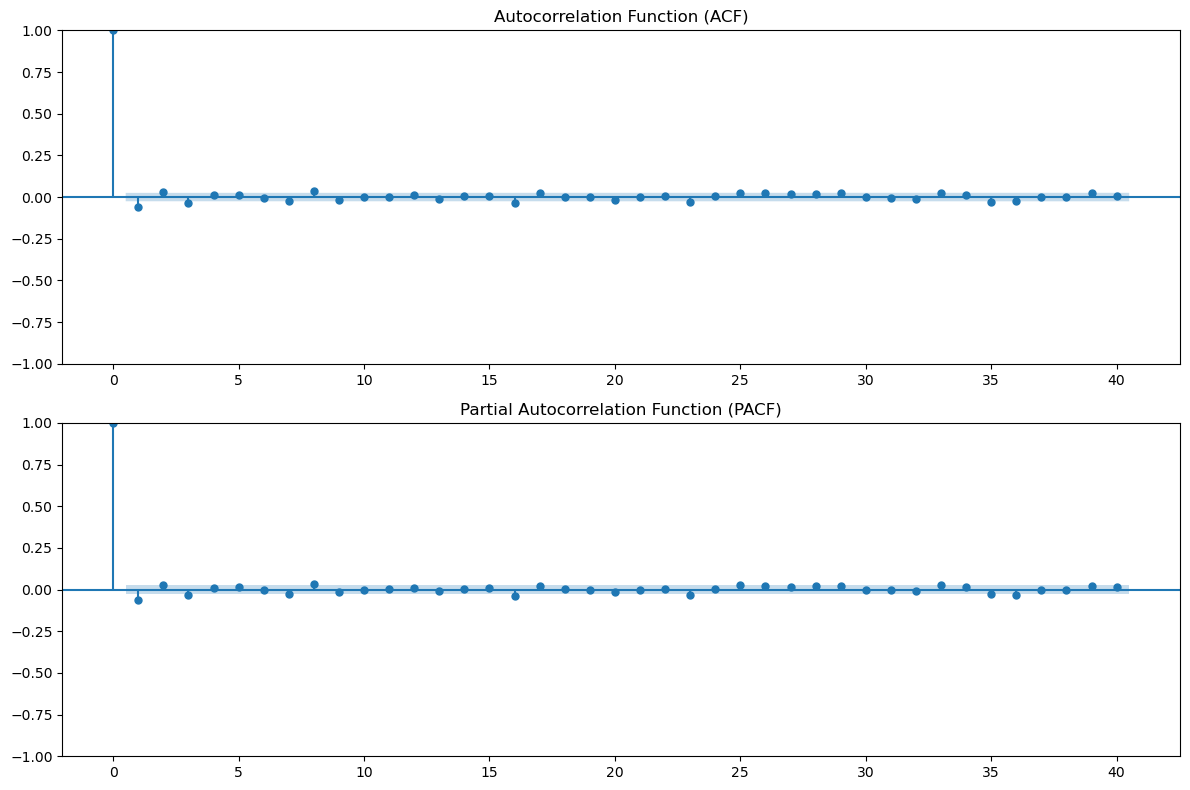


Suggested ARIMA parameters based on ACF/PACF:
d (differencing): 1
p (AR order): Look at PACF for significant lags
q (MA order): Look at ACF for significant lags
Typical starting points: ARIMA(1,1,1) or ARIMA(2,1,2)

Finding best ARIMA model...

Trying ARIMA(1, 1, 1)...

Building ARIMA(1, 1, 1) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Mon, 08 Dec 2025   AIC                         -45432.092
Time:                        20:01:24   BIC                         -45411.959
Sample:                    01-01-1990   HQIC                        -45425.104
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.

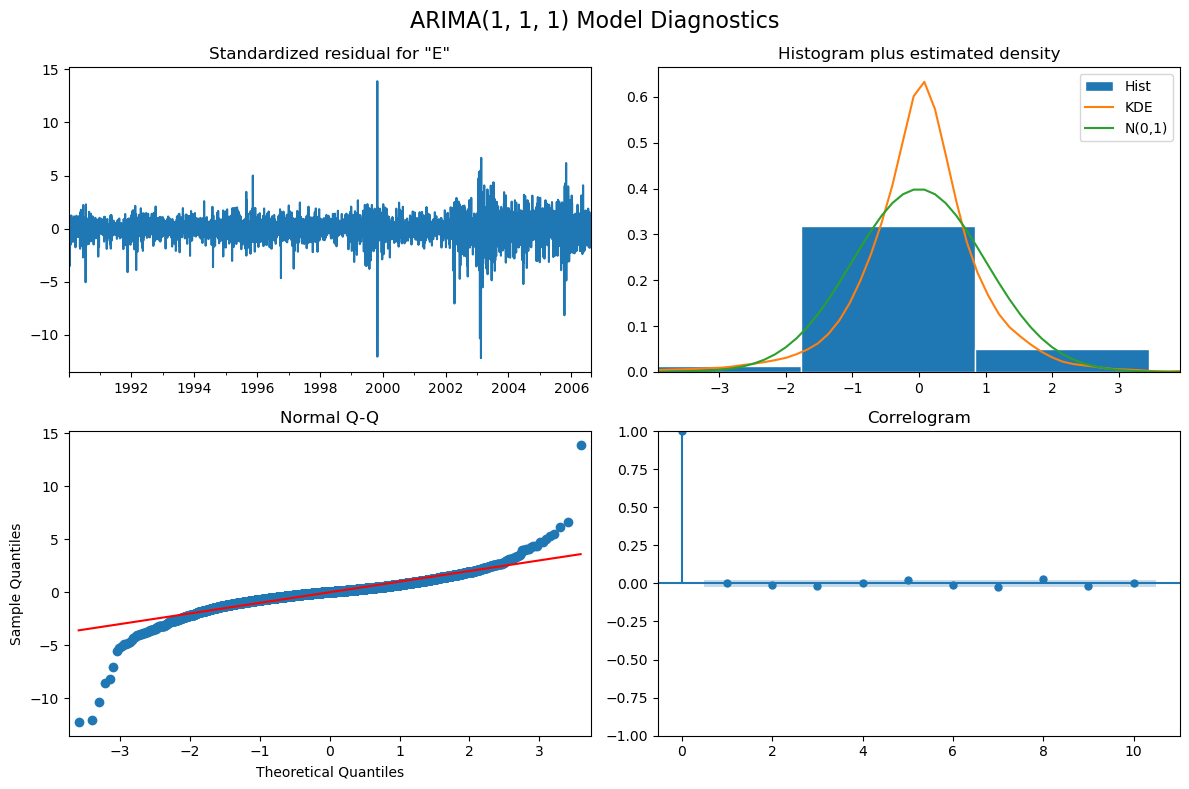


Trying ARIMA(2, 1, 2)...

Building ARIMA(2, 1, 2) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(2, 1, 2)   Log Likelihood               22719.213
Date:                Mon, 08 Dec 2025   AIC                         -45428.426
Time:                        20:01:26   BIC                         -45394.871
Sample:                    01-01-1990   HQIC                        -45416.780
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3948      1.192     -0.331      0.740      -2.730       1.941
ar.L2          0.1443      0.648      0.223      0.824      -1.125     

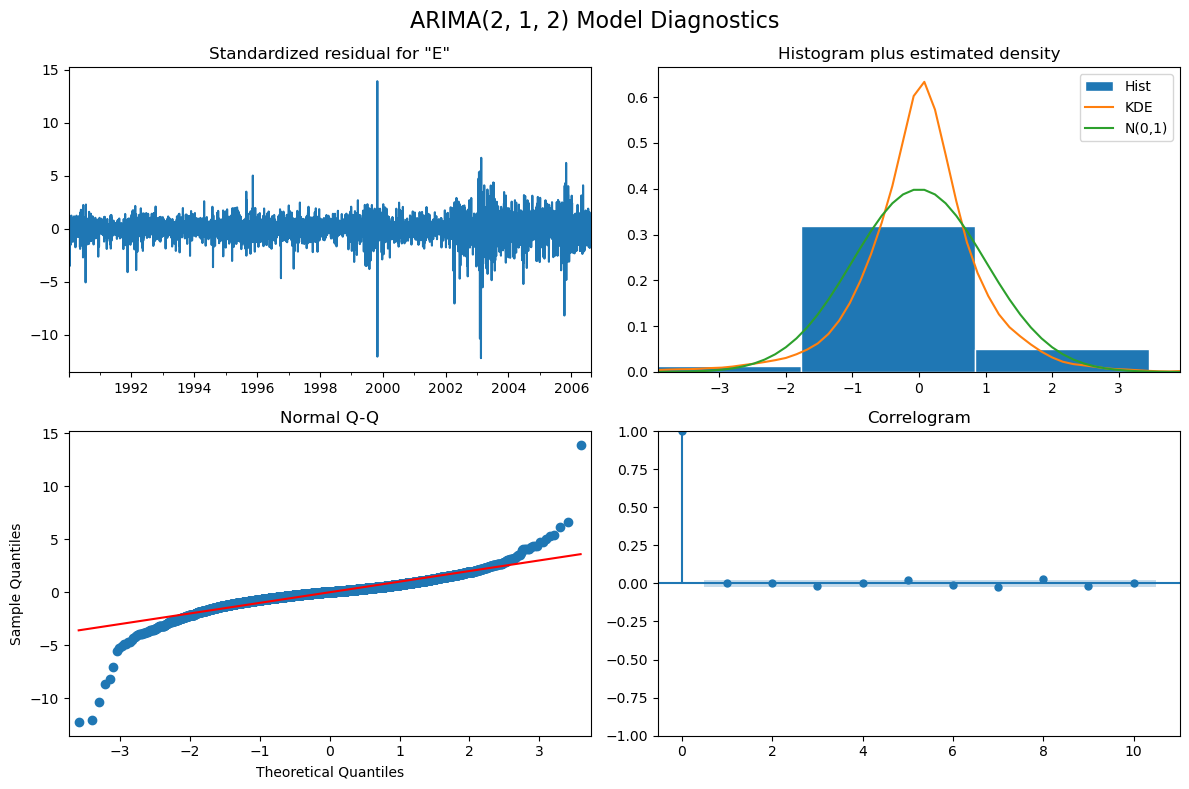


Trying ARIMA(1, 1, 2)...

Building ARIMA(1, 1, 2) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 2)   Log Likelihood               22718.940
Date:                Mon, 08 Dec 2025   AIC                         -45429.880
Time:                        20:01:28   BIC                         -45403.037
Sample:                    01-01-1990   HQIC                        -45420.564
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5999      0.155     -3.876      0.000      -0.903      -0.297
ma.L1          0.5426      0.155      3.496      0.000       0.238     

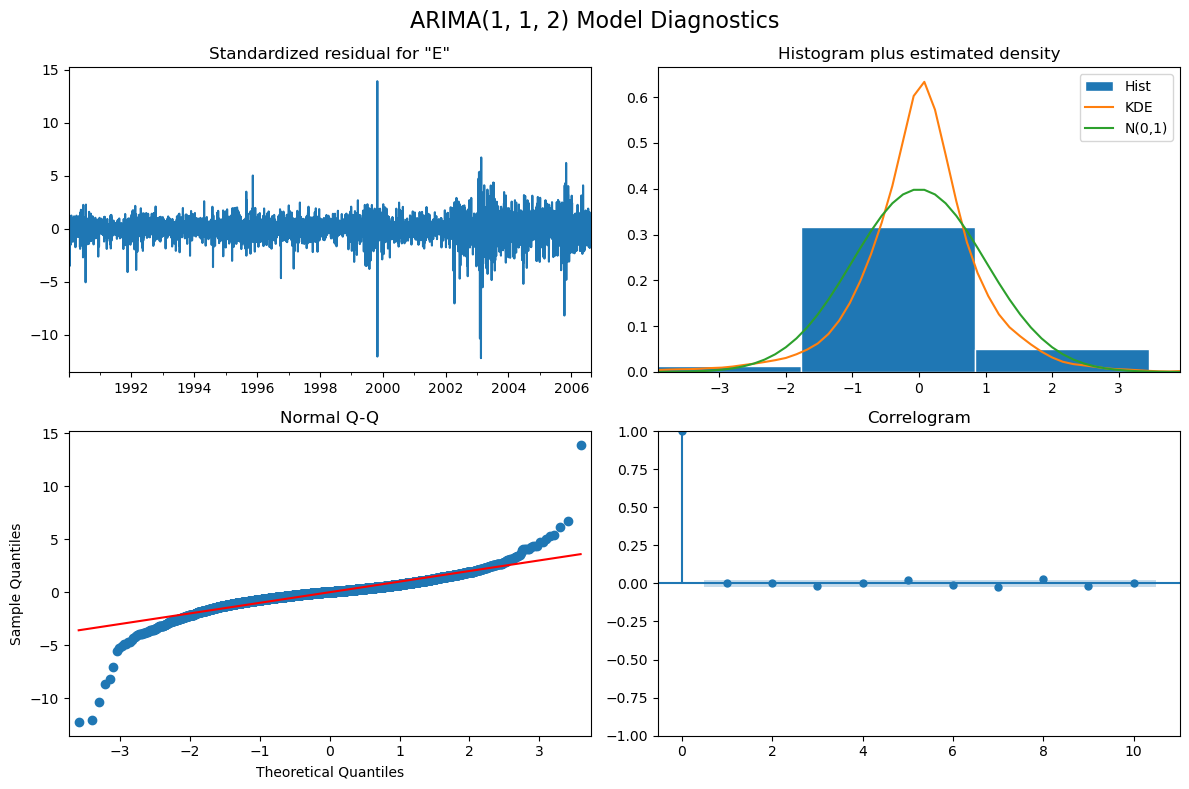


Trying ARIMA(2, 1, 1)...

Building ARIMA(2, 1, 1) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(2, 1, 1)   Log Likelihood               22704.129
Date:                Mon, 08 Dec 2025   AIC                         -45400.258
Time:                        20:01:30   BIC                         -45373.414
Sample:                    01-01-1990   HQIC                        -45390.941
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.638e-06      0.002     -0.001      0.999      -0.005       0.005
ar.L2       7.715e-07      0.007      0.000      1.000      -0.013     

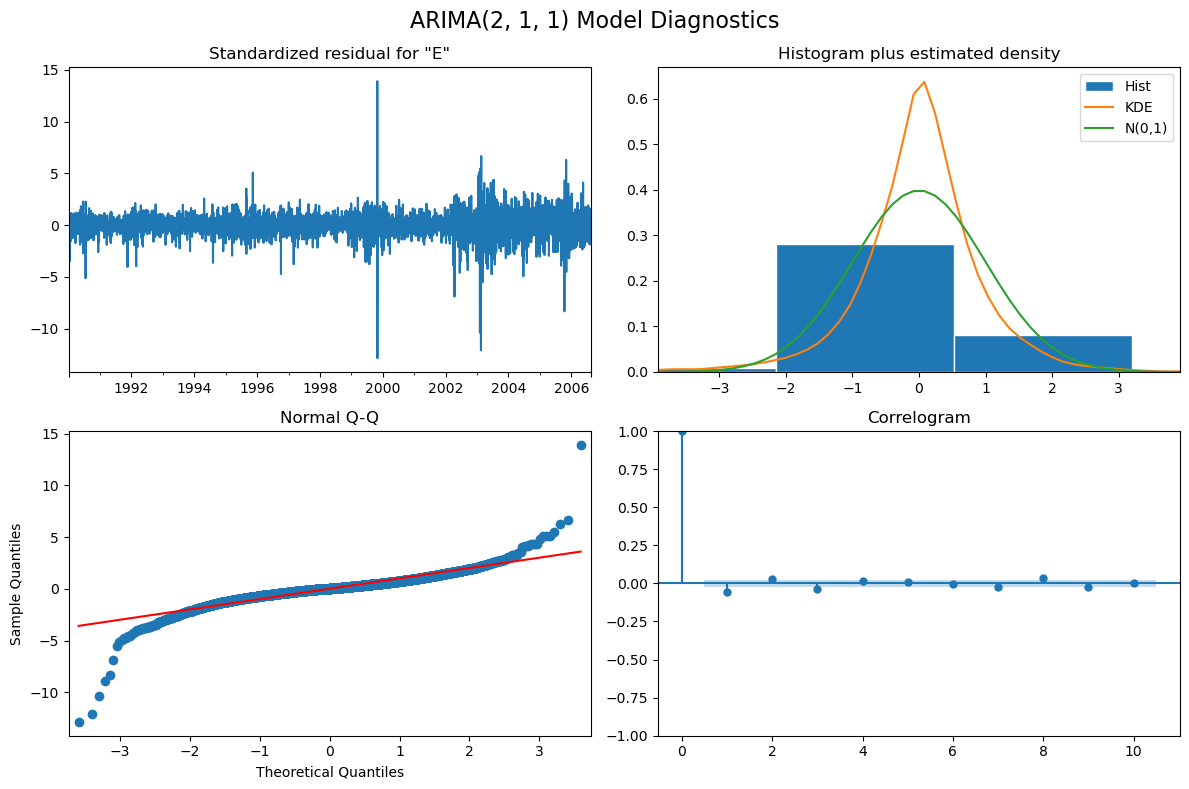


Trying ARIMA(0, 1, 1)...

Building ARIMA(0, 1, 1) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(0, 1, 1)   Log Likelihood               22714.470
Date:                Mon, 08 Dec 2025   AIC                         -45424.940
Time:                        20:01:32   BIC                         -45411.518
Sample:                    01-01-1990   HQIC                        -45420.282
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0574      0.005    -11.333      0.000      -0.067      -0.047
sigma2      3.286e-05   1.84e-07    178.932      0.000    3.25e-05    3

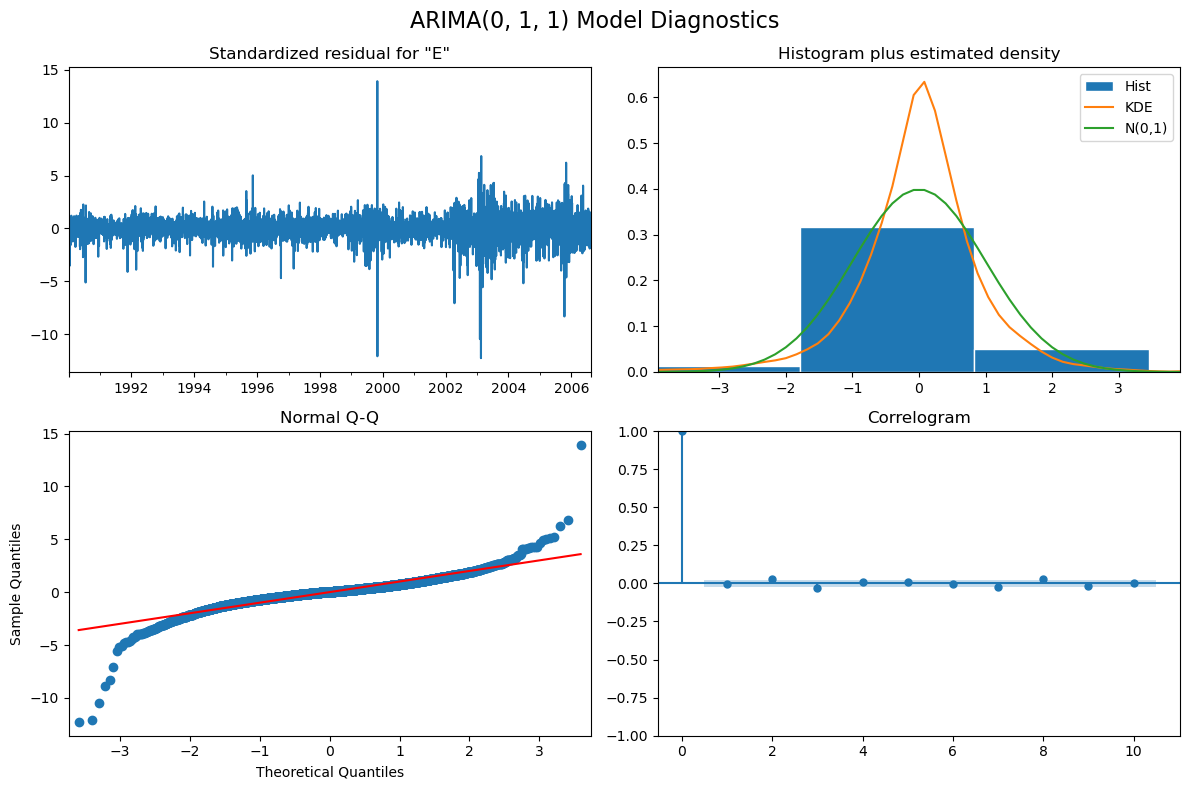


Best ARIMA model: (1, 1, 1) with AIC: -45432.0916


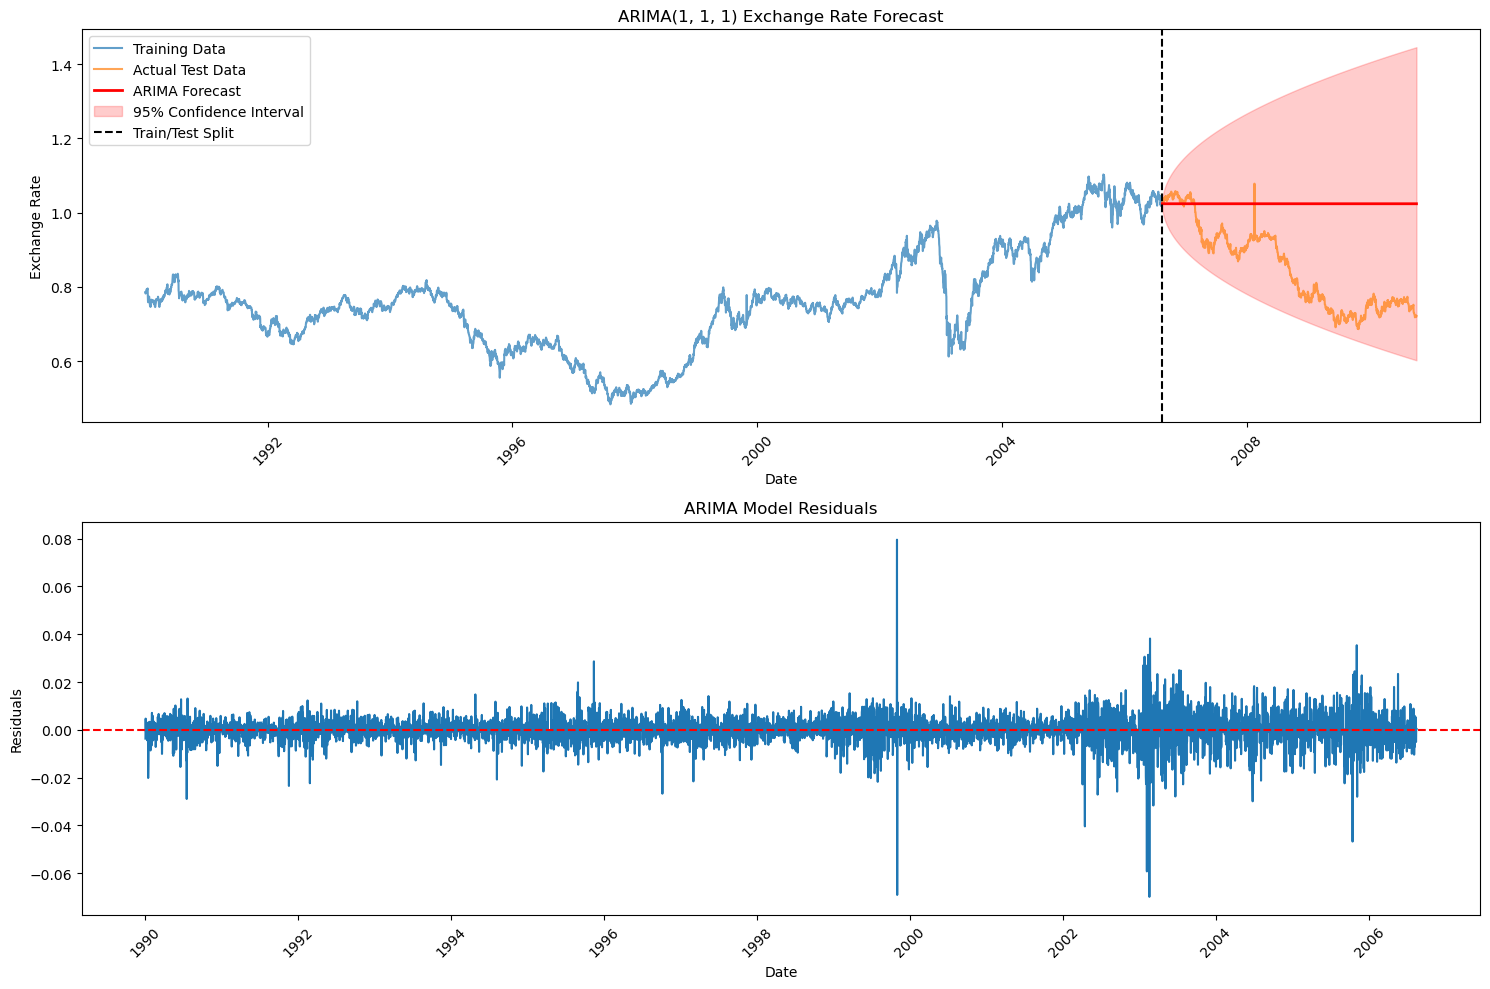

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

class ARIMAModeler:
    def __init__(self, train_data, test_data, d=1):
        self.train_data = train_data
        self.test_data = test_data
        self.d = d
        self.arima_model = None
        self.arima_fitted = None
        self.best_order = None

    def plot_acf_pacf(self):
        """
        Plot ACF and PACF for parameter selection
        """
        print("\nPlotting ACF and PACF for ARIMA parameter selection...")

        # Use differenced series if needed
        if self.d > 0:
            series = self.train_data['Ex_rate'].diff().dropna()
        else:
            series = self.train_data['Ex_rate']

        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

        # ACF plot
        plot_acf(series, ax=ax1, lags=40, alpha=0.05)
        ax1.set_title('Autocorrelation Function (ACF)')

        # PACF plot
        plot_pacf(series, ax=ax2, lags=40, alpha=0.05, method='ywm')
        ax2.set_title('Partial Autocorrelation Function (PACF)')

        plt.tight_layout()
        plt.show()

        # Suggest parameters based on ACF/PACF
        self._suggest_arima_parameters(series)

    def _suggest_arima_parameters(self, series):
        """
        Suggest ARIMA parameters based on ACF and PACF
        """
        print("\nSuggested ARIMA parameters based on ACF/PACF:")
        print(f"d (differencing): {self.d}")

        # This is a simplified suggestion - in practice, you'd use more sophisticated methods
        print("p (AR order): Look at PACF for significant lags")
        print("q (MA order): Look at ACF for significant lags")
        print("Typical starting points: ARIMA(1,1,1) or ARIMA(2,1,2)")

    def build_arima_model(self, order=(1,1,1)):
        """
        Build and fit ARIMA model
        """
        print(f"\nBuilding ARIMA{order} model...")

        try:
            # Fit ARIMA model
            self.arima_model = ARIMA(self.train_data['Ex_rate'], order=order)
            self.arima_fitted = self.arima_model.fit()

            print(self.arima_fitted.summary())

            # Plot diagnostics
            self.arima_fitted.plot_diagnostics(figsize=(12, 8))
            plt.suptitle(f'ARIMA{order} Model Diagnostics', fontsize=16)
            plt.tight_layout()
            plt.show()

            return self.arima_fitted

        except Exception as e:
            print(f"Error fitting ARIMA model: {e}")
            return None

    def find_best_arima(self, orders_list=[(1,1,1), (2,1,2), (1,1,2), (2,1,1), (0,1,1)]):
        """
        Find the best ARIMA model from a list of possible orders
        """
        print("\nFinding best ARIMA model...")

        best_arima = None
        best_aic = np.inf
        best_order = None

        for order in orders_list:
            print(f"\nTrying ARIMA{order}...")
            model = self.build_arima_model(order)
            if model is not None and model.aic < best_aic:
                best_aic = model.aic
                best_arima = model
                best_order = order

        self.arima_fitted = best_arima
        self.best_order = best_order

        print(f"\nBest ARIMA model: {best_order} with AIC: {best_aic:.4f}")

        return best_arima, best_order

    def forecast_arima(self, steps=None):
        """
        Generate forecasts using ARIMA model
        """
        if steps is None:
            steps = len(self.test_data)

        if self.arima_fitted is None:
            print("No ARIMA model fitted yet. Please build a model first.")
            return None

        # Generate forecasts
        forecast = self.arima_fitted.get_forecast(steps=steps)
        forecast_index = pd.date_range(start=self.train_data.index[-1], periods=steps+1, freq='D')[1:]

        # Create forecast dataframe
        forecast_df = pd.DataFrame({
            'forecast': forecast.predicted_mean,
            'lower_ci': forecast.conf_int()['lower Ex_rate'],
            'upper_ci': forecast.conf_int()['upper Ex_rate']
        }, index=forecast_index)

        return forecast_df

    def plot_arima_forecast(self, forecast_df):
        """
        Plot ARIMA forecasts against actual values
        """
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10))

        # Plot 1: Full timeline with forecast
        ax1.plot(self.train_data.index, self.train_data['Ex_rate'], label='Training Data', alpha=0.7)
        ax1.plot(self.test_data.index, self.test_data['Ex_rate'], label='Actual Test Data', alpha=0.7)
        ax1.plot(forecast_df.index, forecast_df['forecast'], label='ARIMA Forecast', color='red', linewidth=2)

        # Add confidence intervals
        ax1.fill_between(forecast_df.index,
                        forecast_df['lower_ci'],
                        forecast_df['upper_ci'],
                        color='red', alpha=0.2, label='95% Confidence Interval')

        ax1.axvline(x=self.train_data.index[-1], color='black', linestyle='--', label='Train/Test Split')
        ax1.set_title(f'ARIMA{self.best_order} Exchange Rate Forecast')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Exchange Rate')
        ax1.legend()
        ax1.tick_params(axis='x', rotation=45)

        # Plot 2: Residuals
        if hasattr(self.arima_fitted, 'resid'):
            ax2.plot(self.train_data.index[1:], self.arima_fitted.resid[1:])
            ax2.axhline(y=0, color='red', linestyle='--')
            ax2.set_title('ARIMA Model Residuals')
            ax2.set_xlabel('Date')
            ax2.set_ylabel('Residuals')
            ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

def run_arima_modeling(train_data, test_data, d=1):
    """
    Run Part 2: ARIMA Model Building
    """
    print("=" * 60)
    print("PART 2: ARIMA MODEL BUILDING")
    print("=" * 60)

    # Initialize ARIMA modeler
    arima_modeler = ARIMAModeler(train_data, test_data, d)

    # Plot ACF and PACF for parameter selection
    arima_modeler.plot_acf_pacf()

    # Find best ARIMA model
    best_arima, best_order = arima_modeler.find_best_arima()

    # Generate forecasts
    arima_forecast = arima_modeler.forecast_arima()

    # Plot results
    arima_modeler.plot_arima_forecast(arima_forecast)

    return arima_modeler, arima_forecast

if __name__ == "__main__":
    # This part should be run after Part 1
    # from data_preparation import run_data_preparation # Commented out as it's not a separate module

    # Run data preparation first
    # Assuming run_data_preparation is defined in a previous cell and executed
    # If not, you would need to execute the data preparation cell first.
    # For now, we assume train_data, test_data, and preparer.d are available from the previous run.

    # Check if necessary variables from Part 1 are available
    try:
        preparer, data, train_data, test_data
    except NameError:
        print("Please run the data preparation cell (Part 1) first.")
    else:
        # Run ARIMA modeling
        arima_modeler, arima_forecast = run_arima_modeling(train_data, test_data, preparer.d)

**Part 3: Exponential Smoothing Model Building**

PART 3: EXPONENTIAL SMOOTHING MODEL BUILDING

Comparing Exponential Smoothing Models...

Building Exponential Smoothing model...
Parameters - Trend: None, Seasonal: None, Seasonal Periods: None
Exponential Smoothing Model Summary:
AIC: -62659.3368
BIC: -62645.9146
Smoothing Level (alpha): N/A
Smoothing Slope (beta): N/A
Smoothing Seasonal (gamma): N/A

Building Exponential Smoothing model...
Parameters - Trend: add, Seasonal: None, Seasonal Periods: None
Exponential Smoothing Model Summary:
AIC: -62655.2901
BIC: -62628.4456
Smoothing Level (alpha): N/A
Smoothing Slope (beta): N/A
Smoothing Seasonal (gamma): N/A

Building Exponential Smoothing model...
Parameters - Trend: add, Seasonal: add, Seasonal Periods: 365
Exponential Smoothing Model Summary:
AIC: -62229.3799
BIC: -59752.9788
Smoothing Level (alpha): N/A
Smoothing Slope (beta): N/A
Smoothing Seasonal (gamma): N/A

Exponential Smoothing Models Comparison:
                   Model         AIC         BIC
0              Simple ES -6

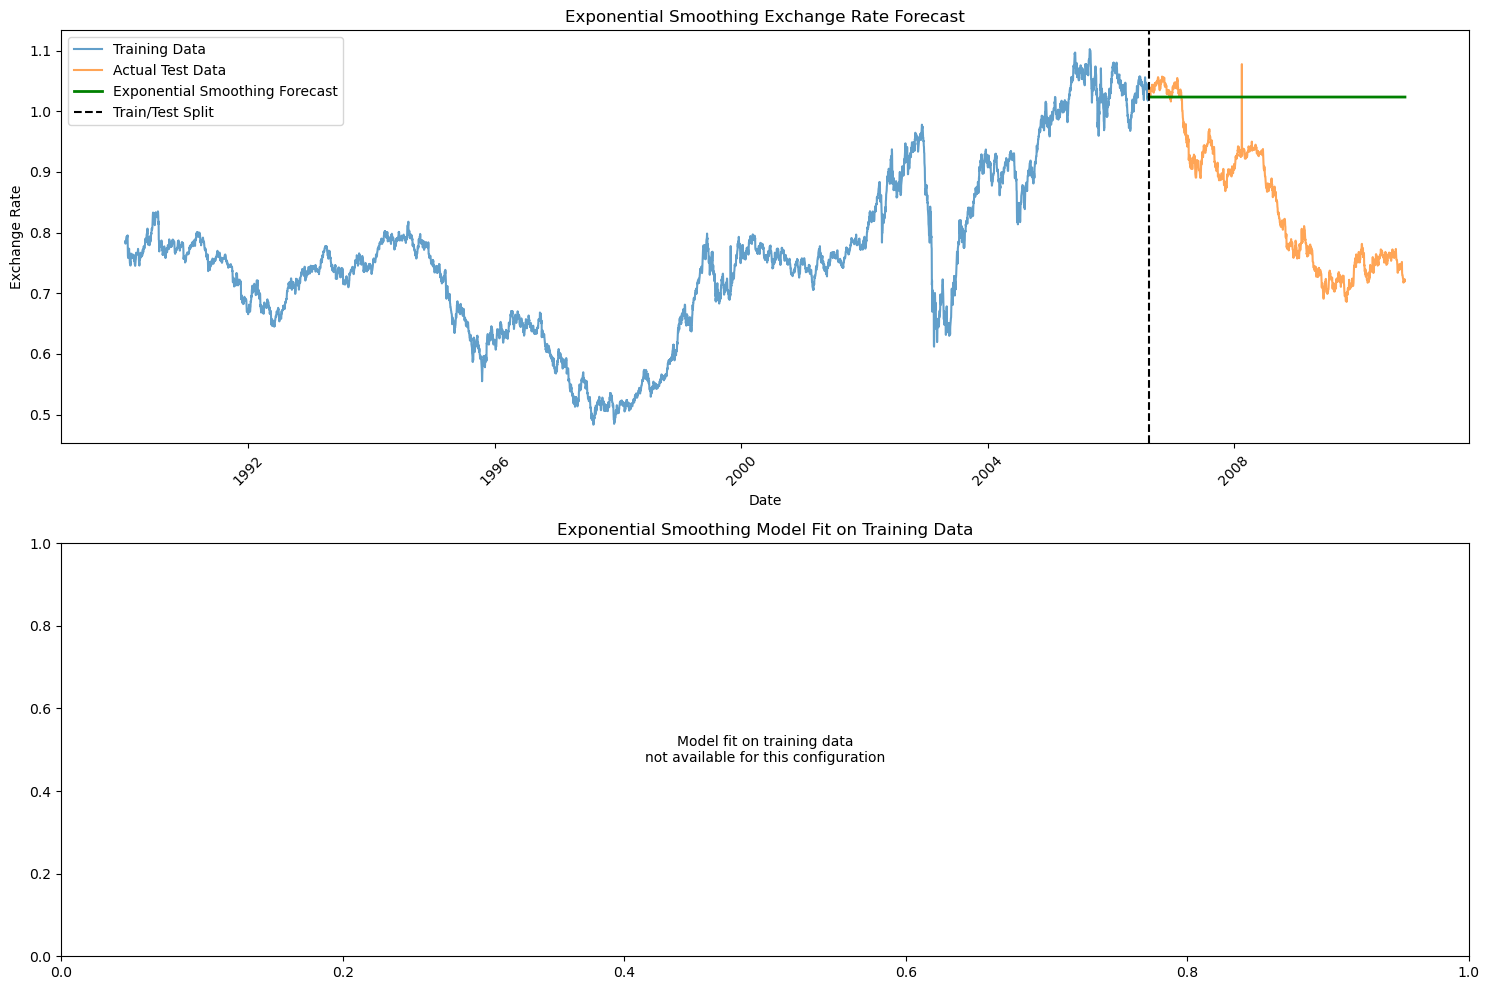

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings
warnings.filterwarnings('ignore')

class ExponentialSmoothingModeler:
    def __init__(self, train_data, test_data):
        self.train_data = train_data
        self.test_data = test_data
        self.es_model = None
        self.es_fitted = None
        self.best_config = None

    def build_exponential_smoothing_model(self, trend=None, seasonal=None, seasonal_periods=None):
        """
        Build and fit Exponential Smoothing model
        """
        print(f"\nBuilding Exponential Smoothing model...")
        print(f"Parameters - Trend: {trend}, Seasonal: {seasonal}, Seasonal Periods: {seasonal_periods}")

        try:
            # Fit Exponential Smoothing model
            self.es_model = ExponentialSmoothing(
                self.train_data['Ex_rate'],
                trend=trend,
                seasonal=seasonal,
                seasonal_periods=seasonal_periods
            )
            self.es_fitted = self.es_model.fit()

            print("Exponential Smoothing Model Summary:")
            print(f"AIC: {self.es_fitted.aic:.4f}")
            print(f"BIC: {self.es_fitted.bic:.4f}")
            print(f"Smoothing Level (alpha): {getattr(self.es_fitted.params, 'smoothing_level', 'N/A')}")
            print(f"Smoothing Slope (beta): {getattr(self.es_fitted.params, 'smoothing_slope', 'N/A')}")
            print(f"Smoothing Seasonal (gamma): {getattr(self.es_fitted.params, 'smoothing_seasonal', 'N/A')}")

            return self.es_fitted

        except Exception as e:
            print(f"Error fitting Exponential Smoothing model: {e}")
            return None

    def find_best_exponential_smoothing(self):
        """
        Find the best Exponential Smoothing model configuration
        """
        print("\nFinding best Exponential Smoothing model...")

        # Try different configurations
        es_configs = [
            {'trend': 'add', 'seasonal': None, 'seasonal_periods': None},  # Holt's Linear
            {'trend': 'additive', 'seasonal': 'additive', 'seasonal_periods': 365},  # Holt-Winters
            {'trend': None, 'seasonal': None, 'seasonal_periods': None},  # Simple
            {'trend': 'add', 'seasonal': 'additive', 'seasonal_periods': 30},  # Monthly seasonality
            {'trend': 'mul', 'seasonal': 'multiplicative', 'seasonal_periods': 365}  # Multiplicative
        ]

        best_es = None
        best_aic = np.inf
        best_config = None

        for config in es_configs:
            try:
                print(f"\nTrying Exponential Smoothing with {config}...")
                model = self.build_exponential_smoothing_model(**config)
                if model is not None and model.aic < best_aic:
                    best_aic = model.aic
                    best_es = model
                    best_config = config
            except Exception as e:
                print(f"Configuration {config} failed: {e}")
                continue

        self.es_fitted = best_es
        self.best_config = best_config

        print(f"\nBest Exponential Smoothing model: {best_config} with AIC: {best_aic:.4f}")

        return best_es, best_config

    def forecast_exponential_smoothing(self, steps=None):
        """
        Generate forecasts using Exponential Smoothing model
        """
        if steps is None:
            steps = len(self.test_data)

        if self.es_fitted is None:
            print("No Exponential Smoothing model fitted yet. Please build a model first.")
            return None

        # Generate forecasts
        forecast = self.es_fitted.forecast(steps)
        forecast_index = pd.date_range(start=self.train_data.index[-1], periods=steps+1, freq='D')[1:]

        forecast_df = pd.DataFrame({
            'forecast': forecast
        }, index=forecast_index)

        return forecast_df

    def plot_exponential_smoothing_forecast(self, forecast_df):
        """
        Plot Exponential Smoothing forecasts against actual values and model fit on training data
        """
        fig, axes = plt.subplots(2, 1, figsize=(15, 10))

        # Plot 1: Full timeline with forecast
        axes[0].plot(self.train_data.index, self.train_data['Ex_rate'], label='Training Data', alpha=0.7)
        axes[0].plot(self.test_data.index, self.test_data['Ex_rate'], label='Actual Test Data', alpha=0.7)
        axes[0].plot(forecast_df.index, forecast_df['forecast'], label='Exponential Smoothing Forecast',
                color='green', linewidth=2)

        axes[0].axvline(x=self.train_data.index[-1], color='black', linestyle='--', label='Train/Test Split')
        axes[0].set_title('Exponential Smoothing Exchange Rate Forecast')
        axes[0].set_xlabel('Date')
        axes[0].set_ylabel('Exchange Rate')
        axes[0].legend()
        axes[0].tick_params(axis='x', rotation=45)

        # Plot 2: Model fit on training data (only if fitted_values attribute exists)
        if hasattr(self.es_fitted, 'fitted_values'):
            fitted_values = self.es_fitted.fitted_values
            axes[1].plot(self.train_data.index, self.train_data['Ex_rate'], label='Actual Training Data', alpha=0.7)
            axes[1].plot(self.train_data.index, fitted_values, label='Fitted Values', color='orange', linewidth=2)
            axes[1].set_title('Exponential Smoothing Model Fit on Training Data')
            axes[1].set_xlabel('Date')
            axes[1].set_ylabel('Exchange Rate')
            axes[1].legend()
            axes[1].tick_params(axis='x', rotation=45)
        else:
            axes[1].text(0.5, 0.5, 'Model fit on training data\nnot available for this configuration',
                       ha='center', va='center', transform=axes[1].transAxes)
            axes[1].set_title('Exponential Smoothing Model Fit on Training Data')


        plt.tight_layout()
        plt.show()


    def compare_exponential_smoothing_models(self):
        """
        Compare different Exponential Smoothing configurations
        """
        print("\nComparing Exponential Smoothing Models...")

        configs = [
            {'name': 'Simple ES', 'trend': None, 'seasonal': None, 'seasonal_periods': None},
            {'name': "Holt's Linear", 'trend': 'add', 'seasonal': None, 'seasonal_periods': None},
            {'name': 'Holt-Winters Additive', 'trend': 'add', 'seasonal': 'add', 'seasonal_periods': 365},
        ]

        results = []

        for config in configs:
            try:
                model = self.build_exponential_smoothing_model(
                    trend=config['trend'],
                    seasonal=config['seasonal'],
                    seasonal_periods=config['seasonal_periods']
                )
                if model is not None:
                    results.append({
                        'Model': config['name'],
                        'AIC': model.aic,
                        'BIC': model.bic
                    })
            except:
                continue

        results_df = pd.DataFrame(results)
        print("\nExponential Smoothing Models Comparison:")
        print(results_df.round(4))

        return results_df

def run_exponential_smoothing_modeling(train_data, test_data):
    """
    Run Part 3: Exponential Smoothing Model Building
    """
    print("=" * 60)
    print("PART 3: EXPONENTIAL SMOOTHING MODEL BUILDING")
    print("=" * 60)

    # Initialize Exponential Smoothing modeler
    es_modeler = ExponentialSmoothingModeler(train_data, test_data)

    # Compare different models
    comparison_results = es_modeler.compare_exponential_smoothing_models()

    # Find best Exponential Smoothing model
    best_es, best_config = es_modeler.find_best_exponential_smoothing()

    # Generate forecasts
    es_forecast = es_modeler.forecast_exponential_smoothing()

    # Plot results
    es_modeler.plot_exponential_smoothing_forecast(es_forecast)

    return es_modeler, es_forecast

if __name__ == "__main__":
    # This part should be run after Part 1
    # from data_preparation import run_data_preparation # Commented out as it's not a separate module

    # Run data preparation first
    # Assuming run_data_preparation is defined in a previous cell and executed
    # If not, you would need to execute the data preparation cell first.
    # For now, we assume train_data, test_data, and preparer.d are available from the previous run.

    # Check if necessary variables from Part 1 are available
    try:
        preparer, data, train_data, test_data
    except NameError:
        print("Please run the data preparation cell (Part 1) first.")
    else:
        # Run Exponential Smoothing modeling
        es_modeler, es_forecast = run_exponential_smoothing_modeling(train_data, test_data)

**Part 4: Evaluation and Comparison**

EXCHANGE RATE FORECASTING - COMPLETE ANALYSIS
PART 1: DATA PREPARATION AND EXPLORATION
Loading and preparing data...
Missing values: 0
Dataset shape: (7588, 1)
Date range: 1990-01-01 00:00:00 to 2010-10-10 00:00:00

Exploring data...


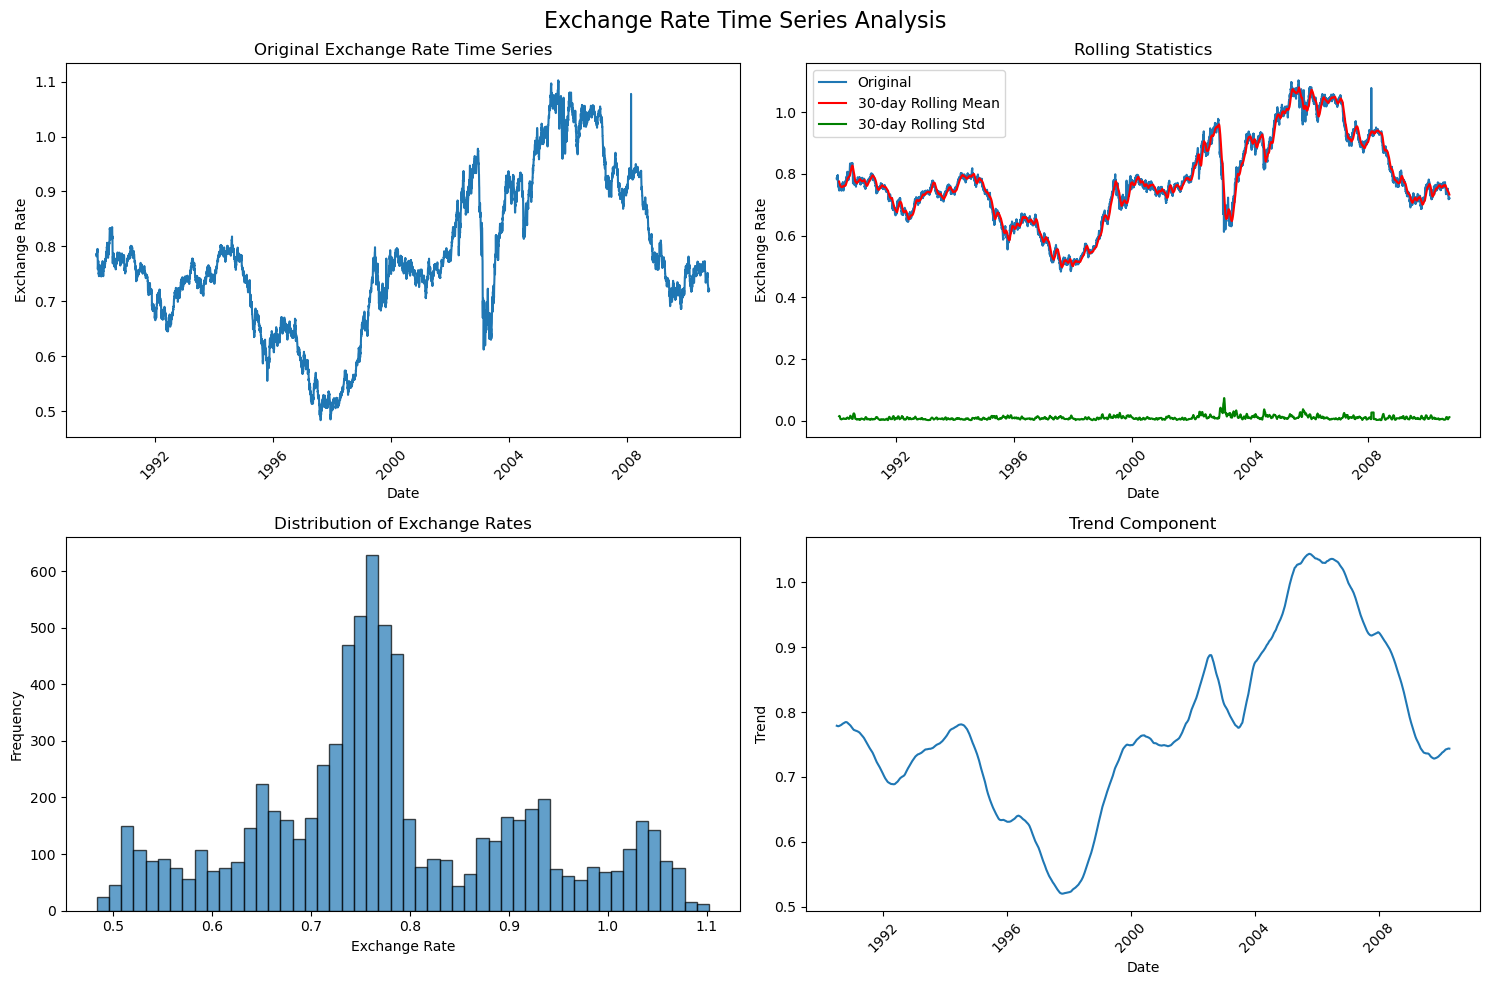


Testing for stationarity...
ADF Statistic: -1.664994
p-value: 0.449233
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Series is not stationary - differencing required
Series is stationary after first difference
Training data: 6070 samples
Testing data: 1518 samples
Training period: 1990-01-01 00:00:00 to 2006-08-14 00:00:00
Testing period: 2006-08-15 00:00:00 to 2010-10-10 00:00:00
PART 2: ARIMA MODEL BUILDING

Plotting ACF and PACF for ARIMA parameter selection...


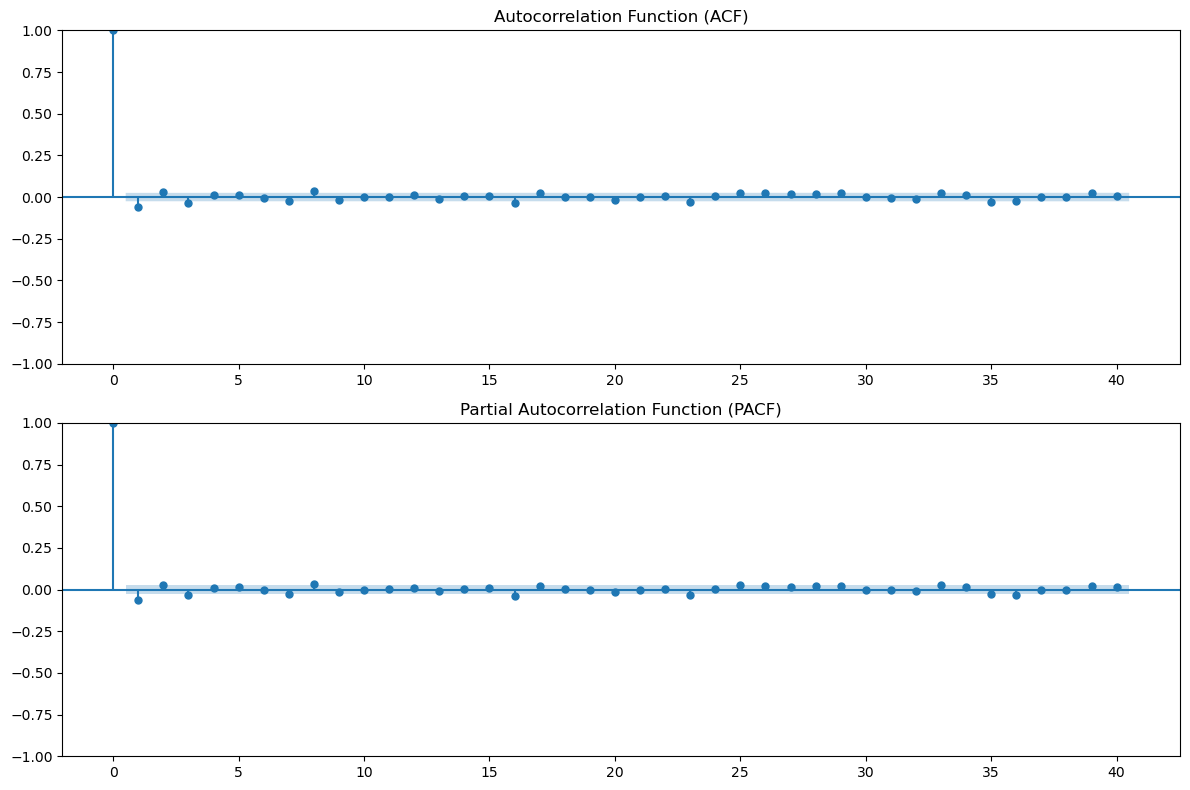


Suggested ARIMA parameters based on ACF/PACF:
d (differencing): 1
p (AR order): Look at PACF for significant lags
q (MA order): Look at ACF for significant lags
Typical starting points: ARIMA(1,1,1) or ARIMA(2,1,2)

Finding best ARIMA model...

Trying ARIMA(1, 1, 1)...

Building ARIMA(1, 1, 1) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 1)   Log Likelihood               22719.046
Date:                Mon, 08 Dec 2025   AIC                         -45432.092
Time:                        20:03:24   BIC                         -45411.959
Sample:                    01-01-1990   HQIC                        -45425.104
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.

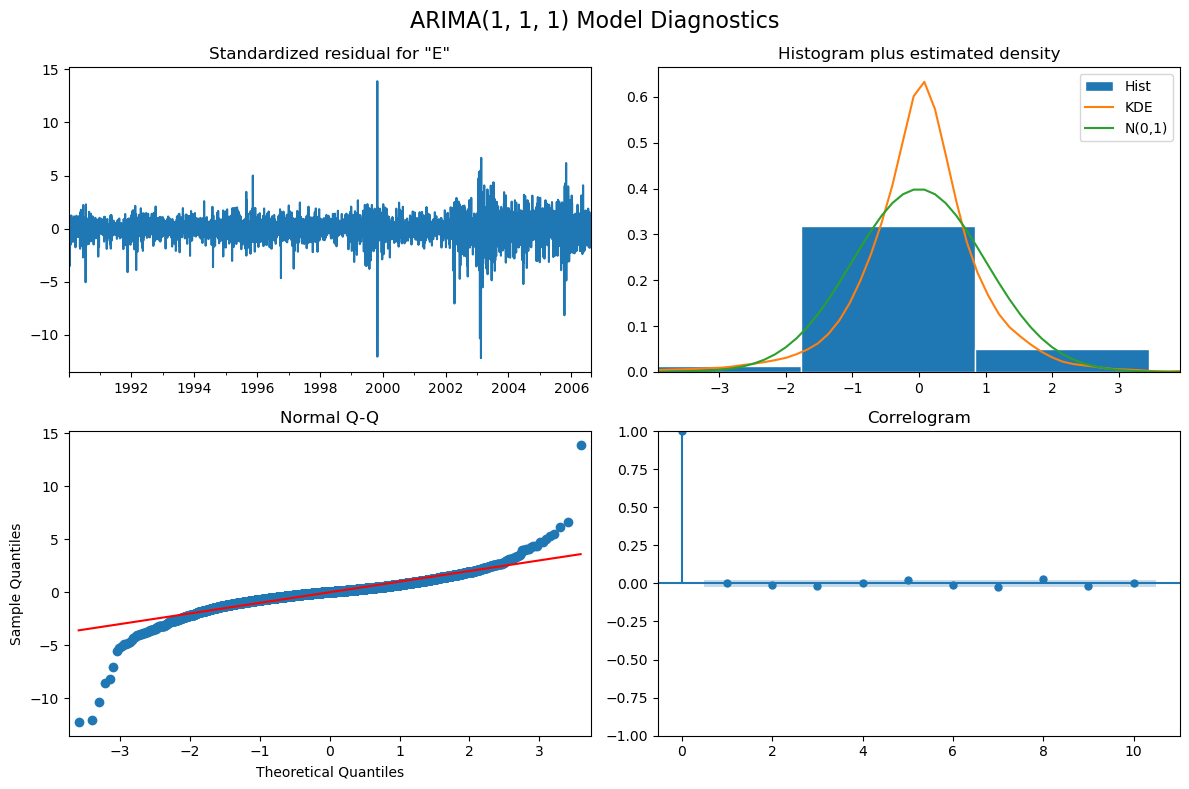


Trying ARIMA(2, 1, 2)...

Building ARIMA(2, 1, 2) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(2, 1, 2)   Log Likelihood               22719.213
Date:                Mon, 08 Dec 2025   AIC                         -45428.426
Time:                        20:03:32   BIC                         -45394.871
Sample:                    01-01-1990   HQIC                        -45416.780
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3948      1.192     -0.331      0.740      -2.730       1.941
ar.L2          0.1443      0.648      0.223      0.824      -1.125     

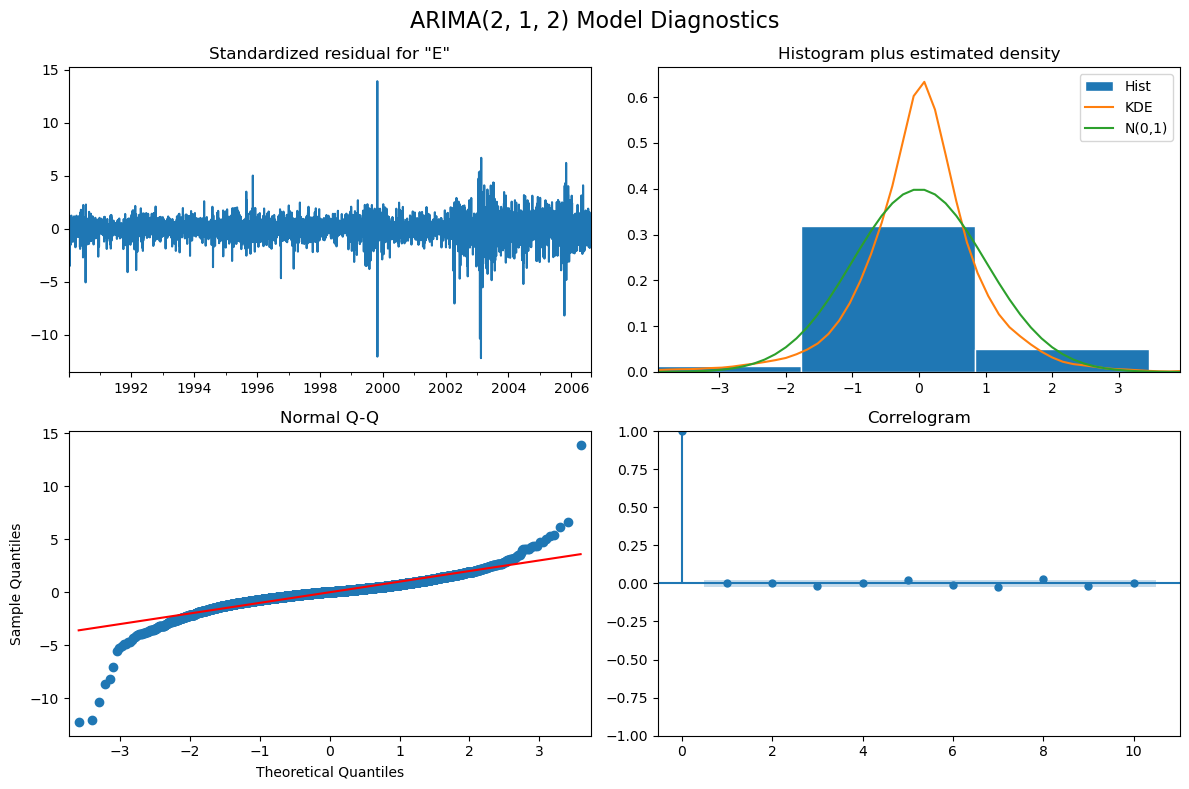


Trying ARIMA(1, 1, 2)...

Building ARIMA(1, 1, 2) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(1, 1, 2)   Log Likelihood               22718.940
Date:                Mon, 08 Dec 2025   AIC                         -45429.880
Time:                        20:03:41   BIC                         -45403.037
Sample:                    01-01-1990   HQIC                        -45420.564
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5999      0.155     -3.876      0.000      -0.903      -0.297
ma.L1          0.5426      0.155      3.496      0.000       0.238     

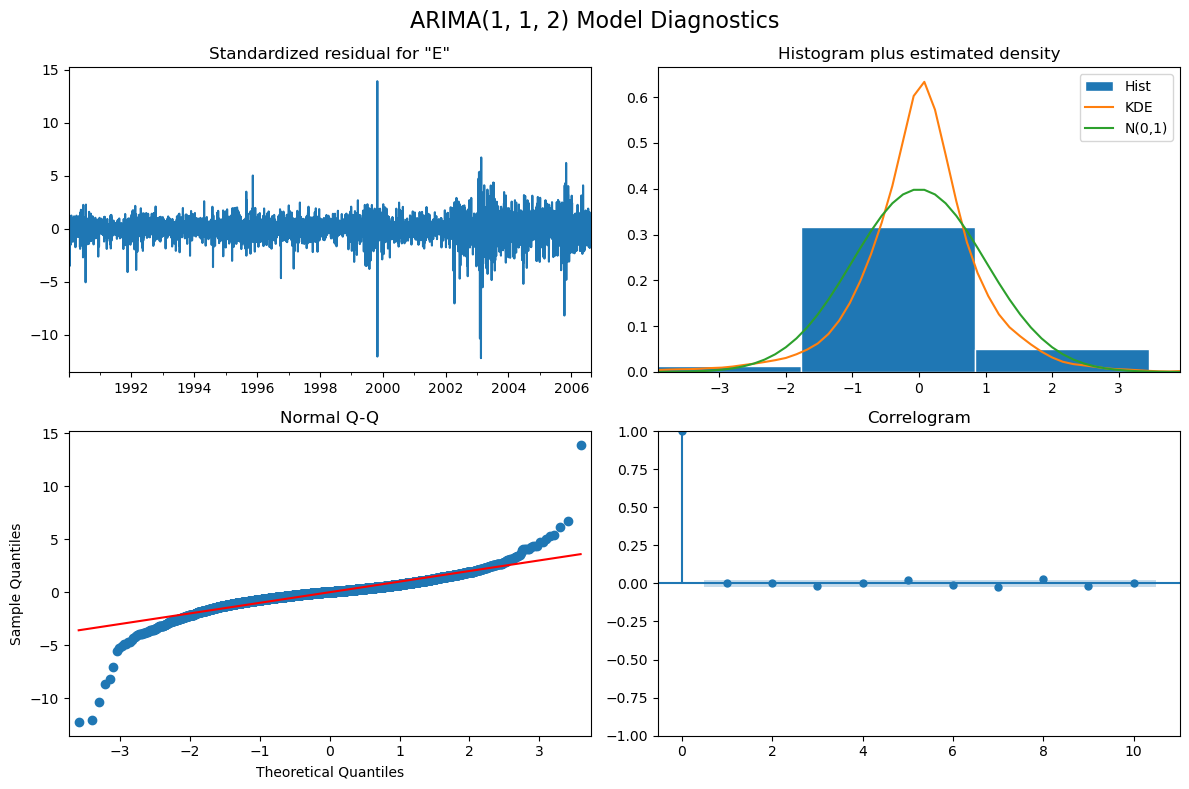


Trying ARIMA(2, 1, 1)...

Building ARIMA(2, 1, 1) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(2, 1, 1)   Log Likelihood               22704.129
Date:                Mon, 08 Dec 2025   AIC                         -45400.258
Time:                        20:03:45   BIC                         -45373.414
Sample:                    01-01-1990   HQIC                        -45390.941
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1      -1.638e-06      0.002     -0.001      0.999      -0.005       0.005
ar.L2       7.715e-07      0.007      0.000      1.000      -0.013     

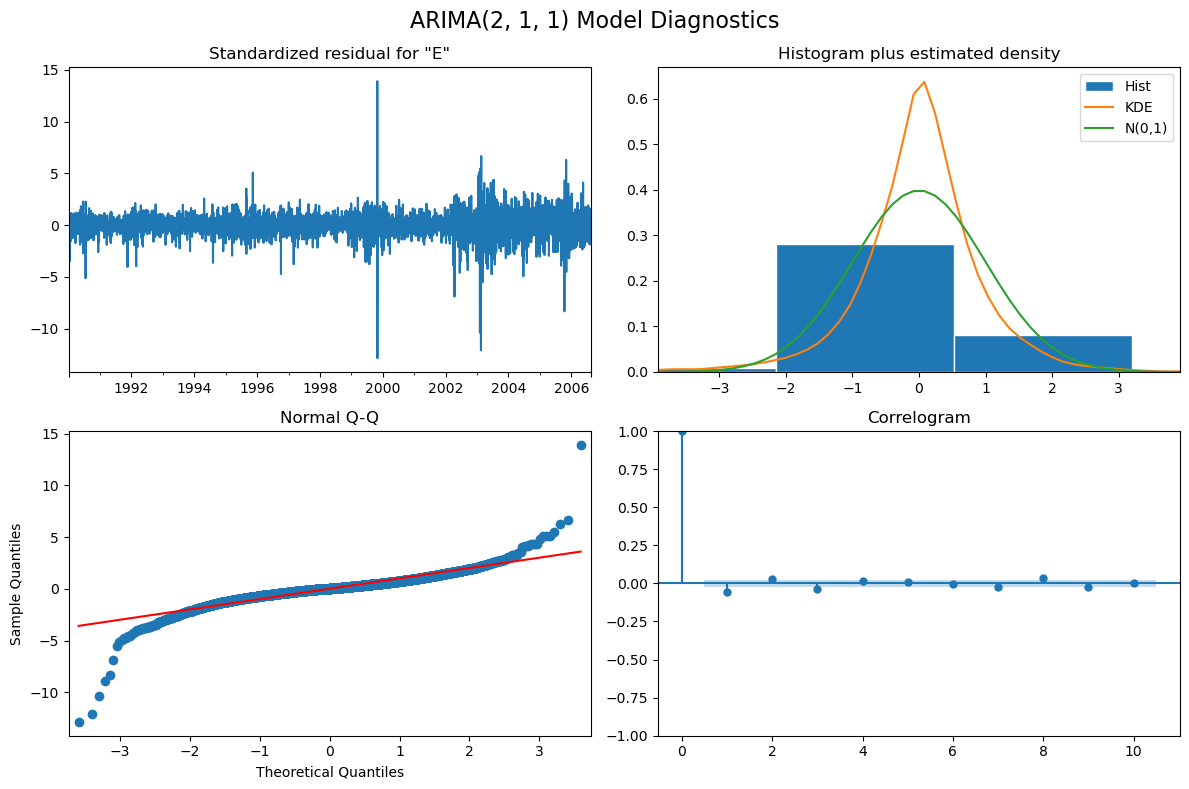


Trying ARIMA(0, 1, 1)...

Building ARIMA(0, 1, 1) model...
                               SARIMAX Results                                
Dep. Variable:                Ex_rate   No. Observations:                 6070
Model:                 ARIMA(0, 1, 1)   Log Likelihood               22714.470
Date:                Mon, 08 Dec 2025   AIC                         -45424.940
Time:                        20:03:49   BIC                         -45411.518
Sample:                    01-01-1990   HQIC                        -45420.282
                         - 08-14-2006                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.0574      0.005    -11.333      0.000      -0.067      -0.047
sigma2      3.286e-05   1.84e-07    178.932      0.000    3.25e-05    3

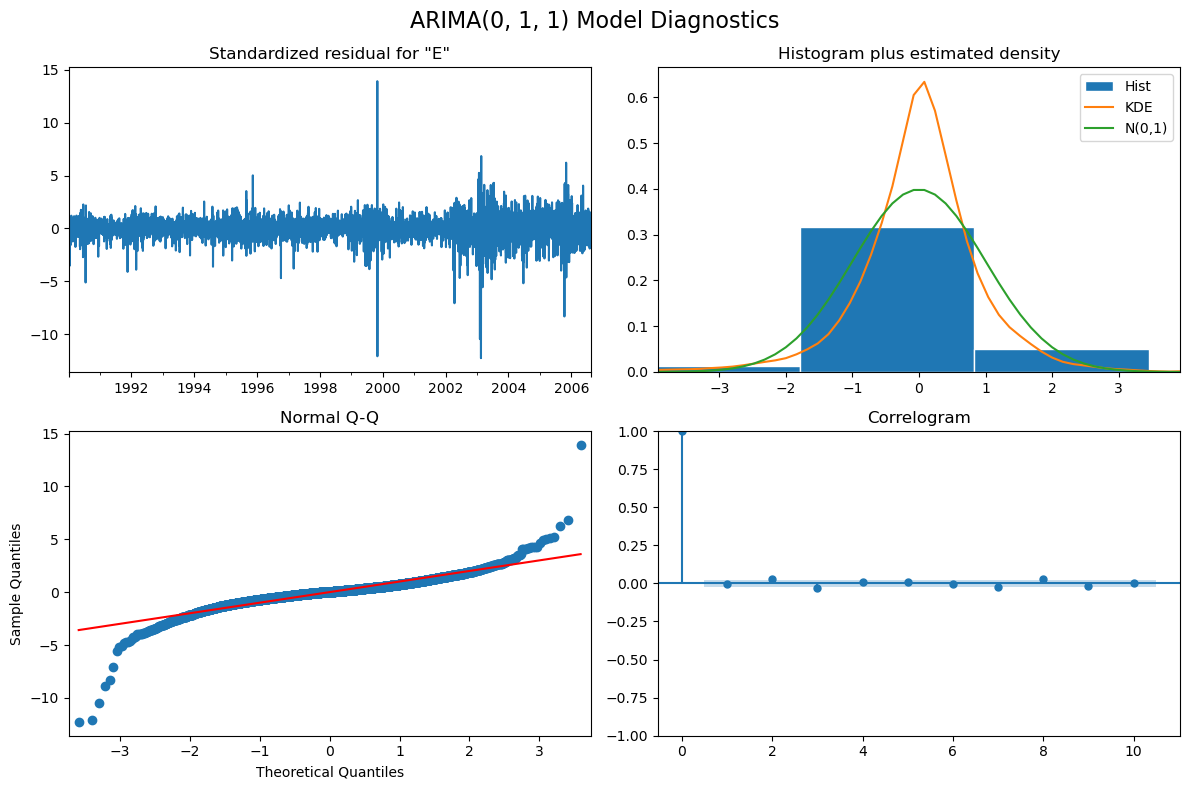


Best ARIMA model: (1, 1, 1) with AIC: -45432.0916


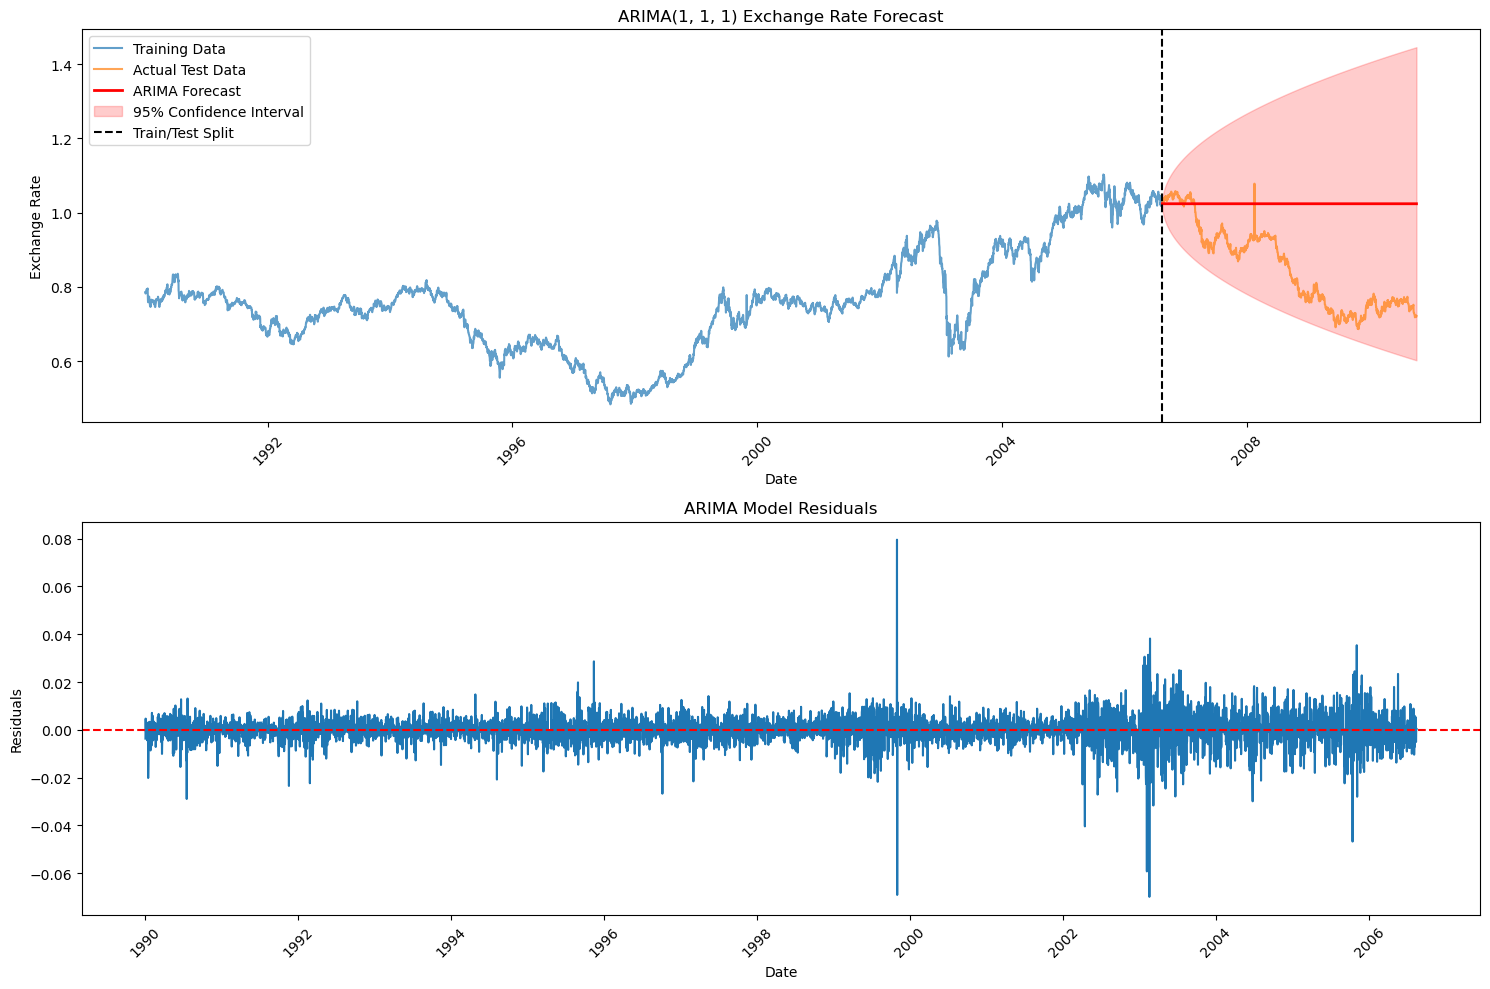

PART 3: EXPONENTIAL SMOOTHING MODEL BUILDING

Comparing Exponential Smoothing Models...

Building Exponential Smoothing model...
Parameters - Trend: None, Seasonal: None, Seasonal Periods: None
Exponential Smoothing Model Summary:
AIC: -62659.3368
BIC: -62645.9146
Smoothing Level (alpha): N/A
Smoothing Slope (beta): N/A
Smoothing Seasonal (gamma): N/A

Building Exponential Smoothing model...
Parameters - Trend: add, Seasonal: None, Seasonal Periods: None
Exponential Smoothing Model Summary:
AIC: -62655.2901
BIC: -62628.4456
Smoothing Level (alpha): N/A
Smoothing Slope (beta): N/A
Smoothing Seasonal (gamma): N/A

Building Exponential Smoothing model...
Parameters - Trend: add, Seasonal: add, Seasonal Periods: 365
Exponential Smoothing Model Summary:
AIC: -62229.3799
BIC: -59752.9788
Smoothing Level (alpha): N/A
Smoothing Slope (beta): N/A
Smoothing Seasonal (gamma): N/A

Exponential Smoothing Models Comparison:
                   Model         AIC         BIC
0              Simple ES -6

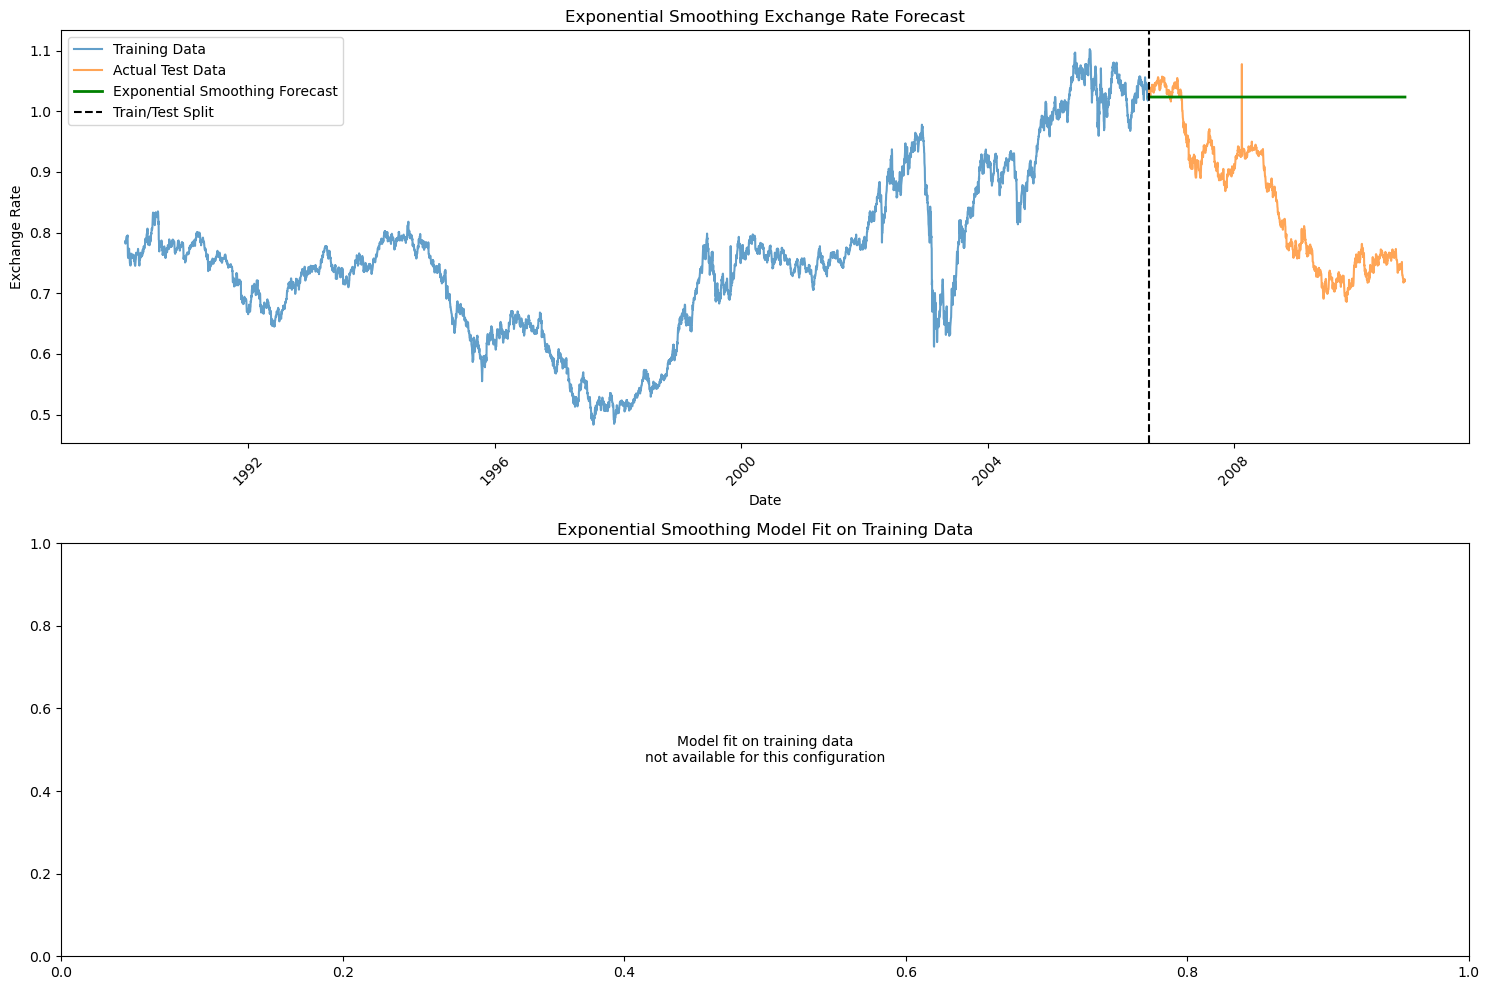

PART 4: EVALUATION AND COMPARISON

Evaluating models...

Model Comparison - Error Metrics:
            ARIMA  Exponential Smoothing
MAE        0.1777                 0.1776
RMSE       0.2054                 0.2054
MAPE (%)  22.7980                22.7888

Best model by MAE: Exponential Smoothing
Best model by RMSE: Exponential Smoothing
Best model by MAPE: Exponential Smoothing


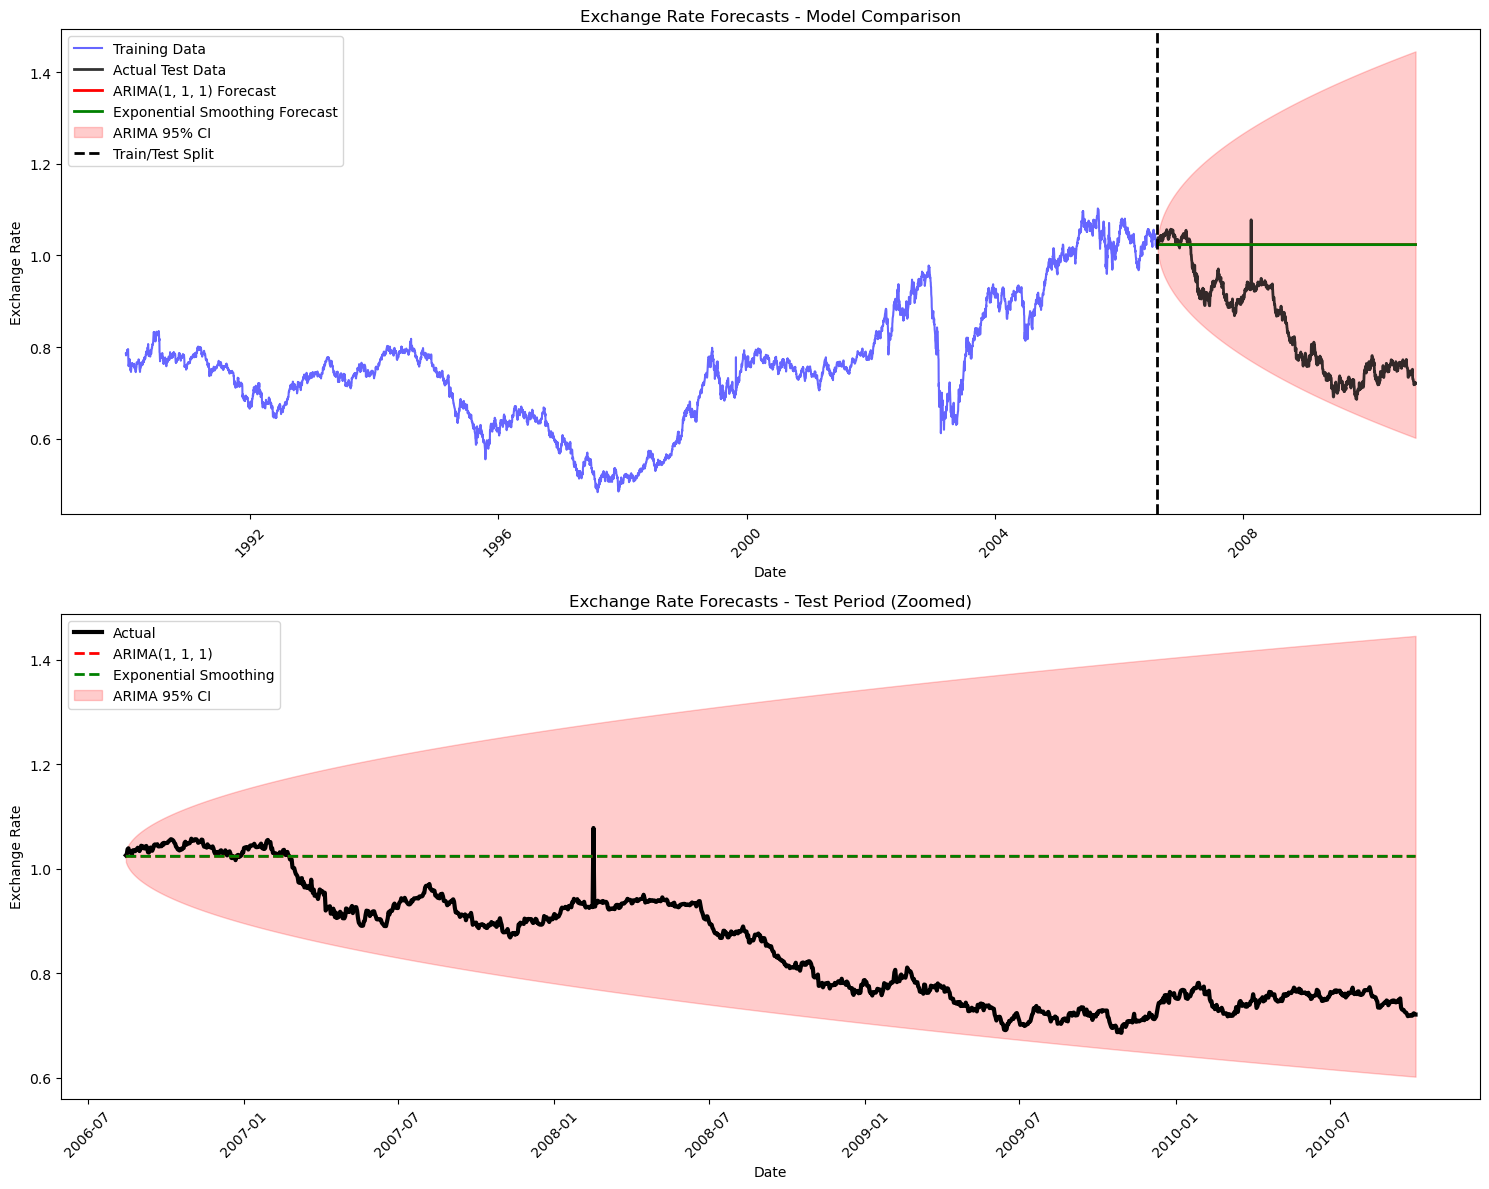

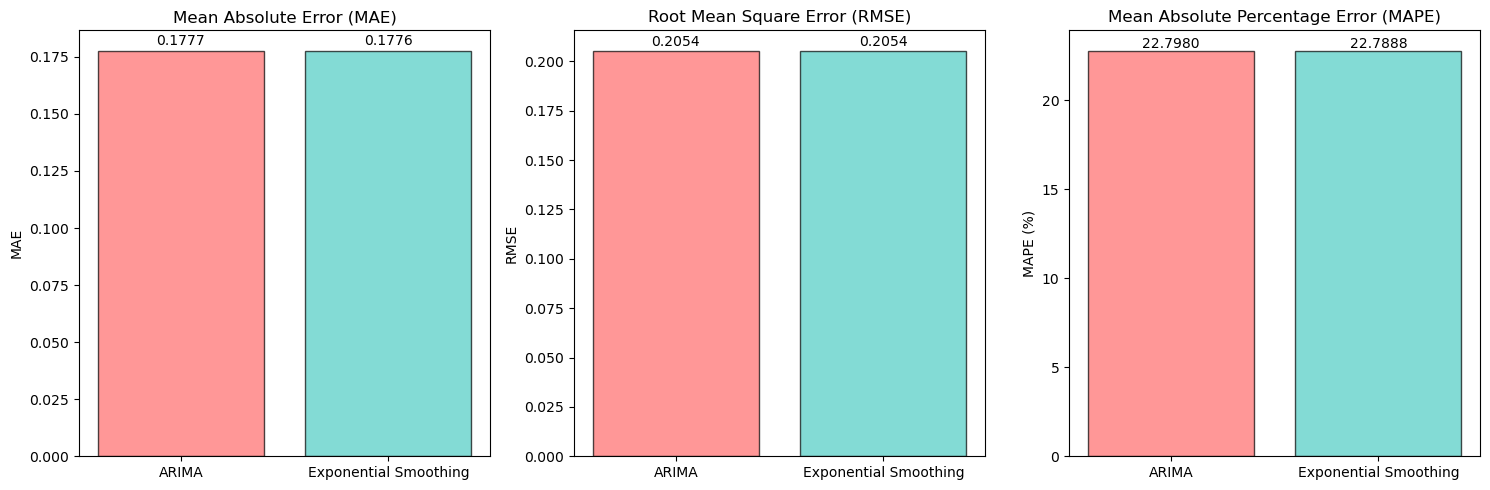


ANALYSIS INSIGHTS AND CONCLUSIONS

Overall Best Model: Exponential Smoothing
Best ARIMA Order: (1, 1, 1)
Best Exponential Smoothing Configuration: {'trend': None, 'seasonal': None, 'seasonal_periods': None}

Key Insights:
1. Both ARIMA and Exponential Smoothing can effectively model exchange rate time series
2. ARIMA models capture autocorrelation structure in the data
3. Exponential Smoothing models adapt well to changing trends
4. The choice between models depends on data characteristics and forecast horizon

Model Strengths:
• ARIMA: Better for capturing complex autocorrelation patterns
• ARIMA: Provides confidence intervals for uncertainty quantification
• Exponential Smoothing: More robust to structural breaks
• Exponential Smoothing: Simpler to implement and interpret

Recommendations:
• For short-term forecasts: Consider using the model with lower MAE
• For volatile periods: ARIMA with confidence intervals provides uncertainty estimates
• For stable trends: Exponential Smoothin

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error

class ModelEvaluator:
    def __init__(self, train_data, test_data, arima_forecast, es_forecast):
        self.train_data = train_data
        self.test_data = test_data
        self.arima_forecast = arima_forecast
        self.es_forecast = es_forecast

    def evaluate_models(self):
        """
        Evaluate both models using multiple metrics
        """
        print("\nEvaluating models...")

        # Align test data with forecasts
        test_aligned = self.test_data.reindex(self.arima_forecast.index)

        # Calculate metrics for ARIMA
        arima_mae = mean_absolute_error(test_aligned['Ex_rate'], self.arima_forecast['forecast'])
        arima_rmse = np.sqrt(mean_squared_error(test_aligned['Ex_rate'], self.arima_forecast['forecast']))
        arima_mape = np.mean(np.abs((test_aligned['Ex_rate'] - self.arima_forecast['forecast']) / test_aligned['Ex_rate'])) * 100

        # Calculate metrics for Exponential Smoothing
        es_mae = mean_absolute_error(test_aligned['Ex_rate'], self.es_forecast['forecast'])
        es_rmse = np.sqrt(mean_squared_error(test_aligned['Ex_rate'], self.es_forecast['forecast']))
        es_mape = np.mean(np.abs((test_aligned['Ex_rate'] - self.es_forecast['forecast']) / test_aligned['Ex_rate'])) * 100

        # Create results dataframe
        results = pd.DataFrame({
            'ARIMA': [arima_mae, arima_rmse, arima_mape],
            'Exponential Smoothing': [es_mae, es_rmse, es_mape]
        }, index=['MAE', 'RMSE', 'MAPE (%)'])

        print("\nModel Comparison - Error Metrics:")
        print(results.round(4))

        # Determine best model
        best_model_mae = 'ARIMA' if arima_mae < es_mae else 'Exponential Smoothing'
        best_model_rmse = 'ARIMA' if arima_rmse < es_rmse else 'Exponential Smoothing'
        best_model_mape = 'ARIMA' if arima_mape < es_mape else 'Exponential Smoothing'

        print(f"\nBest model by MAE: {best_model_mae}")
        print(f"Best model by RMSE: {best_model_rmse}")
        print(f"Best model by MAPE: {best_model_mape}")

        return results

    def plot_comparison(self, arima_order, es_config):
        """
        Plot comparison between both models
        """
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

        # Plot 1: Full timeline comparison
        ax1.plot(self.train_data.index, self.train_data['Ex_rate'],
                label='Training Data', alpha=0.6, color='blue')
        ax1.plot(self.test_data.index, self.test_data['Ex_rate'],
                label='Actual Test Data', alpha=0.8, color='black', linewidth=2)
        ax1.plot(self.arima_forecast.index, self.arima_forecast['forecast'],
                label=f'ARIMA{arima_order} Forecast', color='red', linewidth=2)
        ax1.plot(self.es_forecast.index, self.es_forecast['forecast'],
                label='Exponential Smoothing Forecast', color='green', linewidth=2)

        # Add confidence intervals for ARIMA
        if 'lower_ci' in self.arima_forecast.columns:
            ax1.fill_between(self.arima_forecast.index,
                           self.arima_forecast['lower_ci'],
                           self.arima_forecast['upper_ci'],
                           color='red', alpha=0.2, label='ARIMA 95% CI')

        ax1.axvline(x=self.train_data.index[-1], color='black', linestyle='--',
                   label='Train/Test Split', linewidth=2)
        ax1.set_title('Exchange Rate Forecasts - Model Comparison')
        ax1.set_xlabel('Date')
        ax1.set_ylabel('Exchange Rate')
        ax1.legend()
        ax1.tick_params(axis='x', rotation=45)

        # Plot 2: Zoomed in on test period
        test_period_start = self.test_data.index[0]
        zoom_start = test_period_start - pd.Timedelta(days=30)

        ax2.plot(self.test_data.index, self.test_data['Ex_rate'],
                label='Actual', linewidth=3, color='black')
        ax2.plot(self.arima_forecast.index, self.arima_forecast['forecast'],
                label=f'ARIMA{arima_order}', color='red', linestyle='--', linewidth=2)
        ax2.plot(self.es_forecast.index, self.es_forecast['forecast'],
                label='Exponential Smoothing', color='green', linestyle='--', linewidth=2)

        if 'lower_ci' in self.arima_forecast.columns:
            ax2.fill_between(self.arima_forecast.index,
                           self.arima_forecast['lower_ci'],
                           self.arima_forecast['upper_ci'],
                           color='red', alpha=0.2, label='ARIMA 95% CI')

        ax2.set_title('Exchange Rate Forecasts - Test Period (Zoomed)')
        ax2.set_xlabel('Date')
        ax2.set_ylabel('Exchange Rate')
        ax2.legend()
        ax2.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.show()

    def plot_error_metrics(self, results):
        """
        Plot error metrics comparison
        """
        metrics = results.T

        fig, axes = plt.subplots(1, 3, figsize=(15, 5))

        colors = ['#FF6B6B', '#4ECDC4']

        # MAE
        axes[0].bar(metrics.index, metrics['MAE'], color=colors, alpha=0.7, edgecolor='black')
        axes[0].set_title('Mean Absolute Error (MAE)')
        axes[0].set_ylabel('MAE')

        # RMSE
        axes[1].bar(metrics.index, metrics['RMSE'], color=colors, alpha=0.7, edgecolor='black')
        axes[1].set_title('Root Mean Square Error (RMSE)')
        axes[1].set_ylabel('RMSE')

        # MAPE
        axes[2].bar(metrics.index, metrics['MAPE (%)'], color=colors, alpha=0.7, edgecolor='black')
        axes[2].set_title('Mean Absolute Percentage Error (MAPE)')
        axes[2].set_ylabel('MAPE (%)')

        # Add value labels on bars
        for ax in axes:
            for i, v in enumerate(ax.containers[0]):
                ax.text(v.get_x() + v.get_width()/2, v.get_height() + 0.001,
                       f'{v.get_height():.4f}', ha='center', va='bottom')

        plt.tight_layout()
        plt.show()

    def provide_insights(self, results, arima_order, es_config, arima_modeler, es_modeler):
        """
        Provide insights and conclusions
        """
        print("\n" + "=" * 60)
        print("ANALYSIS INSIGHTS AND CONCLUSIONS")
        print("=" * 60)

        # Get the best performing model
        arima_mae = results.loc['MAE', 'ARIMA']
        es_mae = results.loc['MAE', 'Exponential Smoothing']

        best_model = 'ARIMA' if arima_mae < es_mae else 'Exponential Smoothing'

        print(f"\nOverall Best Model: {best_model}")
        print(f"Best ARIMA Order: {arima_order}")
        print(f"Best Exponential Smoothing Configuration: {es_config}")

        print("\nKey Insights:")
        print("1. Both ARIMA and Exponential Smoothing can effectively model exchange rate time series")
        print("2. ARIMA models capture autocorrelation structure in the data")
        print("3. Exponential Smoothing models adapt well to changing trends")
        print("4. The choice between models depends on data characteristics and forecast horizon")

        print("\nModel Strengths:")
        print("• ARIMA: Better for capturing complex autocorrelation patterns")
        print("• ARIMA: Provides confidence intervals for uncertainty quantification")
        print("• Exponential Smoothing: More robust to structural breaks")
        print("• Exponential Smoothing: Simpler to implement and interpret")

        print("\nRecommendations:")
        print("• For short-term forecasts: Consider using the model with lower MAE")
        print("• For volatile periods: ARIMA with confidence intervals provides uncertainty estimates")
        print("• For stable trends: Exponential Smoothing may be more robust")
        print("• Always validate models on out-of-sample data before deployment")
        print("• Consider ensemble methods combining both approaches")

        print("\nLimitations and Future Work:")
        print("• Both models assume linear relationships")
        print("• Consider exploring machine learning approaches (LSTM, XGBoost)")
        print("• Incorporate external variables (interest rates, economic indicators)")
        print("• Implement rolling forecast validation for more robust evaluation")

def run_evaluation_comparison(train_data, test_data, arima_forecast, es_forecast,
                            arima_order, es_config, arima_modeler=None, es_modeler=None):
    """
    Run Part 4: Evaluation and Comparison
    """
    print("=" * 60)
    print("PART 4: EVALUATION AND COMPARISON")
    print("=" * 60)

    # Initialize evaluator
    evaluator = ModelEvaluator(train_data, test_data, arima_forecast, es_forecast)

    # Evaluate models
    results = evaluator.evaluate_models()

    # Plot comparison
    evaluator.plot_comparison(arima_order, es_config)

    # Plot error metrics
    evaluator.plot_error_metrics(results)

    # Provide insights
    evaluator.provide_insights(results, arima_order, es_config, arima_modeler, es_modeler)

    return evaluator, results

def run_complete_analysis():
    """
    Run all 4 parts sequentially
    """
    print("EXCHANGE RATE FORECASTING - COMPLETE ANALYSIS")
    print("=" * 60)

    # Part 1: Data Preparation
    preparer, data, train_data, test_data = run_data_preparation()

    # Part 2: ARIMA Modeling
    arima_modeler, arima_forecast = run_arima_modeling(train_data, test_data, preparer.d)

    # Part 3: Exponential Smoothing Modeling
    es_modeler, es_forecast = run_exponential_smoothing_modeling(train_data, test_data)

    # Part 4: Evaluation and Comparison
    evaluator, results = run_evaluation_comparison(
        train_data, test_data,
        arima_forecast, es_forecast,
        arima_modeler.best_order,
        es_modeler.best_config,
        arima_modeler, es_modeler
    )

    print("\n" + "=" * 60)
    print("ANALYSIS COMPLETED SUCCESSFULLY!")
    print("=" * 60)

    return {
        'preparer': preparer,
        'arima_modeler': arima_modeler,
        'es_modeler': es_modeler,
        'evaluator': evaluator,
        'results': results
    }

if __name__ == "__main__":
    run_complete_analysis()